<a href="https://colab.research.google.com/github/jlresendizg/econometria/blob/main/SLB_Heston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHILE SLB

In [1]:
#!pip install arch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy.stats as stats
import scipy.stats as st
from scipy.stats import binom
from scipy.optimize import curve_fit
from arch import arch_model
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib.ticker import FixedLocator, FuncFormatter, IndexLocator
from pandas.tseries.offsets import DateOffset
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from scipy.interpolate import griddata
from math import sqrt
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import jarque_bera
from arch.univariate import GARCH, ConstantMean
from scipy.stats import skew, kurtosis, norm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 10.9 MB/s eta 0:00:00


<ipython-input-34-50e54ae8fe95>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  historical_dates_datetime = pd.to_datetime(date_range.astype(str))
<ipython-input-34-50e54ae8fe95>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  future_dates_datetime = pd.to_datetime(future_dates.astype(str))
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004019. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting 

Probability of achieving the Target KPI by 2032Q4: 58.62%
Drift: 0.047258436612598334
Initial Variance: 0.0435058217723819
Mean Reversion Level for the Variance: 0.014860781283279698
Volatility of Variance: 0.003995199906561516
Mean Reversion Speed for the Variance: 0.0131321366685343
Estimated rho: 0.5564139441624386
Probability of achieving the Target KPI by 2032Q4 considering transition plan: 70.44%
Adjusted Drift: 0.04495314702173988
Adjusted Initial Variance: 0.009667960393862644


<ipython-input-34-50e54ae8fe95>:160: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.fill = False
<ipython-input-34-50e54ae8fe95>:161: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane.fill = False
<ipython-input-34-50e54ae8fe95>:162: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.pane.fill = False
<ipython-input-34-50e54ae8fe95>:163: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.set_edgecolor('lightgrey')
<ipython-input-34-50e54ae8fe95>:164: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane

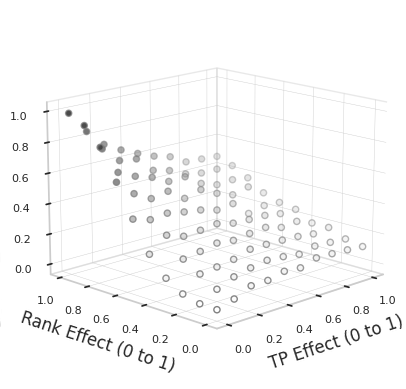

A more ambitious target could be set at 68.82113414791203, which has a lower probability of being achieved.
A more ambitious target could be set at 76.23042095830806, which has a lower probability of being achieved.
McNemar's test statistic: 315.2907001951008
P-value: 1.537135488147729e-70
Cohen's d effect size: 0.24896898073512144
95% Confidence Interval for Cohen's d: (0.22040303022631733, 0.2775349312439256)
Standard Model - RMSE: 1.1948678099524817, MAE: 0.8778452439107548
Transition Model - RMSE: 1.0896999763290633, MAE: 1.004943961811886


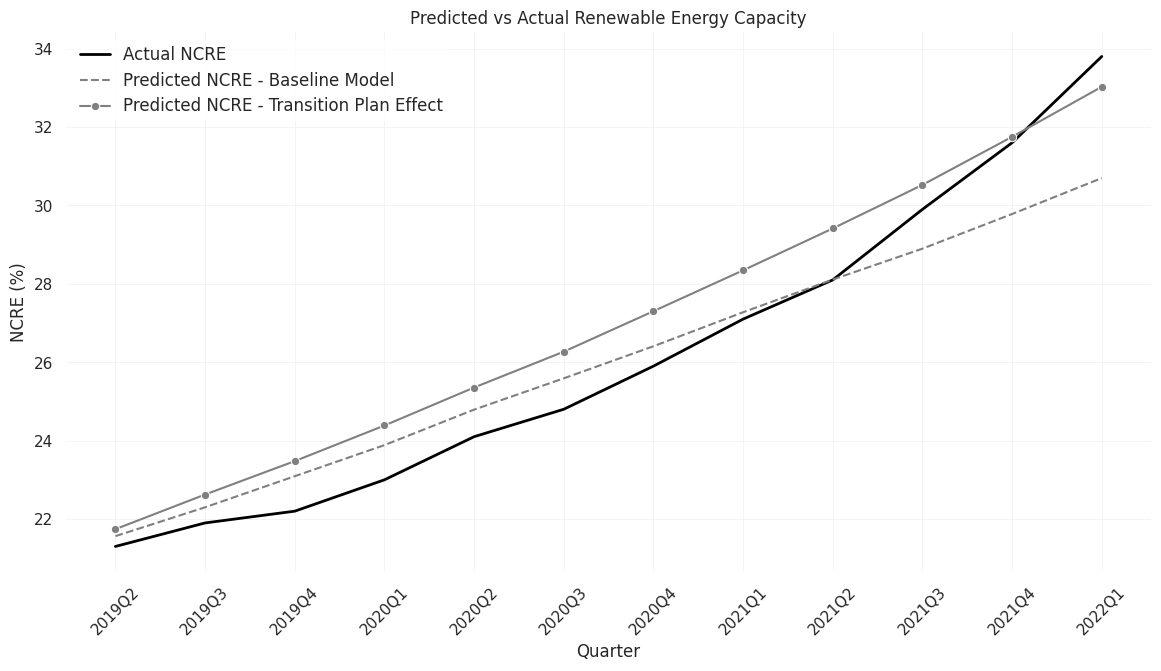

Standard Model Residuals:
Mean: 0.1095, Standard Deviation: 1.1898
Skewness: 1.4268, Kurtosis: 0.8528


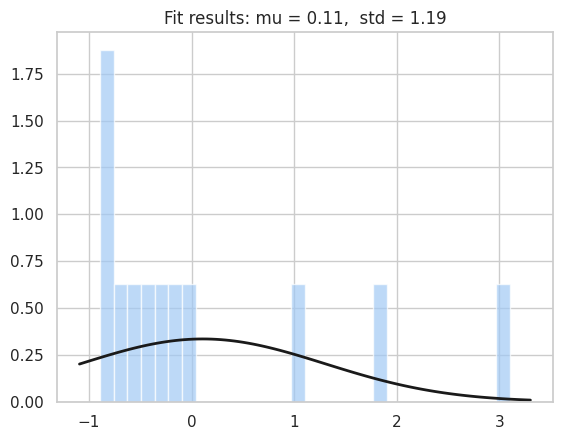

Transition Model Residuals:
Mean: -0.8761, Standard Deviation: 0.6480
Skewness: 1.2956, Kurtosis: 0.8196


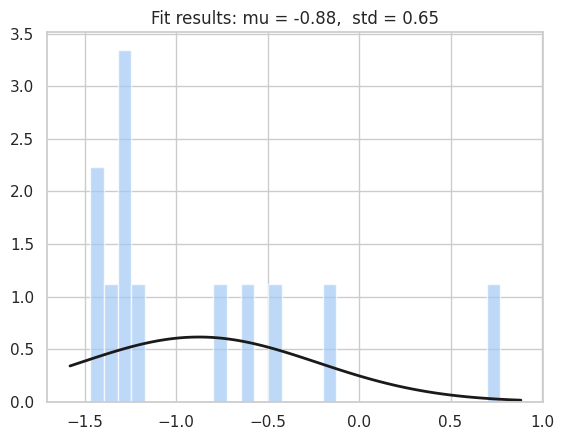

            mean        std       min    max
100     63.00099  29.990604  6.370487  100.0
1000   64.940729  28.491558  1.602377  100.0
5000    65.12989  28.533085  2.289903  100.0
10000  65.751465   28.36831  1.925741  100.0


In [ ]:
######################################################################################################################################################
######################################################################################################################################################

# CHILE NCRE

######################################################################################################################################################
######################################################################################################################################################

np.random.seed(41)

# Historical quarterly renewable energy capacity data
historical_kpi = np.array([9, 9, 11.1, 11.6, 12.9, 13.1, 14, 14, 16, 17, 18, 18, 18, 19, 20, 20.6, 20.9, 21.3, 21.9, 22.2, 23, 24.1,
       24.8, 25.9, 27.1, 28.1, 29.9, 31.6, 33.8])

# Generate date range for historical data
start_date, end_date = "2015Q1", "2022Q1"
date_range = pd.period_range(start_date, end_date, freq='Q')
historical_dates_datetime = pd.to_datetime(date_range.astype(str))
target_date = '2032Q4'
future_dates = pd.period_range(start=date_range[-1] + 1, end=target_date, freq='Q')
future_dates_datetime = pd.to_datetime(future_dates.astype(str))
num_quarters_to_target = len(pd.period_range(start="2022Q2", end=target_date, freq='Q'))


##############################################################################################################################
# ADAPTED HESTON MODEL


def mean_reversion(kpi):
    log_returns = np.diff(np.log(kpi))
    returns = np.diff(kpi, n=1) * 0.1
    garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='skewt')
    garch_fit = garch_model.fit(update_freq=5, disp='off')
    omega = garch_fit.params['omega']
    alpha = garch_fit.params['alpha[1]']
    beta = garch_fit.params['beta[1]']
    conditional_volatility = garch_fit.conditional_volatility
    variances = conditional_volatility**2
    xi = np.mean(variances)
    rho = np.corrcoef(log_returns[:-1], variances[1:])[0, 1]

    if alpha + beta < 1:
        theta = omega / (1 - alpha - beta)
        kappa = 1 - alpha - beta
        return theta, kappa, xi, rho
    else:
        print("Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.")
        return None, None

def monte_carlo_simulation(M, N, dt, drift, kappa, theta, xi, rho, initial_value, initial_variance):
    S = np.zeros((M, N + 1))
    V = np.zeros((M, N + 1))
    S[:, 0] = initial_value
    V[:, 0] = initial_variance
    for t in range(1, N + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * np.sqrt(dt) * z1, 0)
        S[:, t] = np.minimum(S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2), 100)
    return S

# Parameters
log_returns = np.diff(np.log(historical_kpi))
drift = np.mean(log_returns)
volatility = np.std(log_returns)
theta, kappa, xi, rho = mean_reversion(historical_kpi)

# Monte Carlo simulation settings
M = 10000
N = len(future_dates)
dt = 1
S = monte_carlo_simulation(M, N, dt, drift, kappa, theta, xi, rho, historical_kpi[-1], volatility)

# Output results
target_kpi = 60
target_date = '2032Q4'
target_date_period = pd.Period(target_date, freq='Q')
index_target = np.where(future_dates == target_date_period)[0][0]
probability_of_achieving_target = np.mean(S[:, index_target] >= target_kpi)
print(f"Probability of achieving the Target KPI by 2032Q4: {probability_of_achieving_target:.2%}")
print(f"Drift: {drift}")
print(f"Initial Variance: {volatility}")
print(f"Mean Reversion Level for the Variance: {theta}")
print(f"Volatility of Variance: {xi}")
print(f"Mean Reversion Speed for the Variance: {kappa}")
print(f"Estimated rho: {rho}")

###################################################################################################################################################################
# HESTON MODEL + TRANSITION PLAN

# Parameters and Initialization
transition_plan = 7
TP_min, TP_max = 0, 9
rank, total_peers = 2, 40

def adjust_parameters(transition_plan, TP_min, TP_max, rank, total_peers, mu0, v0):
    tp_effect = (1-((transition_plan - TP_min) / (TP_max - TP_min)))
    adjusted_volatility = v0 * tp_effect

    rank_effect = ((total_peers + 1 - rank) / (total_peers + 1))
    adjusted_drift = mu0 * rank_effect

    return adjusted_drift, adjusted_volatility

# Adjust parameters based on transition plan and rank
adjusted_drift, adjusted_volatility = adjust_parameters(transition_plan, TP_min, TP_max, rank, total_peers, drift, volatility)

# Monte Carlo simulation settings
S_tp = monte_carlo_simulation(M, N, 0.5, adjusted_drift, kappa, theta, xi, rho, historical_kpi[-1], adjusted_volatility)
probability_of_achieving_target_tp = np.mean(S_tp[:, index_target] >= target_kpi)
print(f"Probability of achieving the Target KPI by 2032Q4 considering transition plan: {probability_of_achieving_target_tp:.2%}")
print(f"Adjusted Drift: {adjusted_drift}")
print(f"Adjusted Initial Variance: {adjusted_volatility}")

###################################################################################################################################################################
#SENSITIVITY

# Adjusted function to calculate probabilities within the range 0 to 1 for tp_effect and rank_effect
def calculate_probability_within_range(tp_effect, rank_effect, kappa, theta, xi, rho, initial_value):
    adjusted_drift = drift * rank_effect
    adjusted_volatility = volatility * tp_effect
    S_tp = monte_carlo_simulation(1000, N, 0.5, adjusted_drift, kappa, theta, xi, rho, initial_value, adjusted_volatility)
    probability_of_achieving_target_tp = np.mean(S_tp[:, index_target] >= target_kpi)
    return probability_of_achieving_target_tp

# Grid of tp and rank effects
tp_effects = np.linspace(0, 1, 10)
rank_effects = np.linspace(0, 1, 10)

# Compute meshgrid for tp and rank effects
TP, RANK = np.meshgrid(tp_effects, rank_effects)

# Storage for new probabilities
new_probabilities = np.zeros(TP.shape)

# Compute new probabilities for each combination within the range 0 to 1
for i in range(TP.shape[0]):
    for j in range(TP.shape[1]):
        new_probabilities[i, j] = calculate_probability_within_range(TP[i, j], RANK[i, j], kappa, theta, xi, rho, historical_kpi[-1])

# Flatten arrays for plotting
tp_flat = TP.flatten()
rank_flat = RANK.flatten()
prob_flat = new_probabilities.flatten()

# Plotting the adjusted scatter plot
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tp_flat, rank_flat, prob_flat, c=prob_flat, cmap='Greys', edgecolors='grey')


ax.set_xlabel('TP Effect (0 to 1)')
ax.set_ylabel('Rank Effect (0 to 1)')
ax.set_zlabel('Probability of Achieving Target TP')

ax.view_init(elev=15, azim=225)  # You can adjust these angles as needed

# Set background and grid colors
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.w_xaxis.pane.set_edgecolor('lightgrey')
ax.w_yaxis.pane.set_edgecolor('lightgrey')
ax.w_zaxis.pane.set_edgecolor('lightgrey')

# Adjust grid lines directly in 3D
ax.xaxis._axinfo["grid"]['linewidth'] = 0.3
ax.yaxis._axinfo["grid"]['linewidth'] = 0.3
ax.zaxis._axinfo["grid"]['linewidth'] = 0.3
ax.grid(True, linestyle='--', color='lightgrey')

ax.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size for ticks

plt.show()

##########################################################################################################################
# AMBITION OT TARGETS

target_quarter_index = future_dates.get_loc(target_date)
# Sort the simulated outcomes for the target quarter
sorted_outcomes = np.sort(S[:, target_quarter_index])
# If you want a value that is less likely to be achieved, look for a higher percentile
more_ambitious_target = np.percentile(sorted_outcomes, 50) # 60% probability
print(f"A more ambitious target could be set at {more_ambitious_target}, which has a lower probability of being achieved.")

# Sort the simulated outcomes for the target quarter
sorted_outcomes_tp = np.sort(S_tp[:, target_quarter_index])
# If you want a value that is less likely to be achieved, look for a higher percentile
more_ambitious_target_tp = np.percentile(sorted_outcomes_tp, 50) # 60% probability
print(f"A more ambitious target could be set at {more_ambitious_target_tp}, which has a lower probability of being achieved.")

###################################################################################################################################################################
# DIFFERENCE TEST

S = np.random.choice([0, 1], p=[1-probability_of_achieving_target, probability_of_achieving_target], size=10000)
S_tp = np.random.choice([0, 1], p=[1-probability_of_achieving_target_tp, probability_of_achieving_target_tp], size=10000)

table = [[np.sum((S == 0) & (S_tp == 0)), np.sum((S == 0) & (S_tp == 1))],
         [np.sum((S == 1) & (S_tp == 0)), np.sum((S == 1) & (S_tp == 1))]]

result = mcnemar(table, exact=False, correction=True)
print("McNemar's test statistic:", result.statistic)
print("P-value:", result.pvalue)

# Cohen's d calculation based on your formula
d = (probability_of_achieving_target_tp - probability_of_achieving_target) / np.sqrt(
    (probability_of_achieving_target * (1 - probability_of_achieving_target) +
     probability_of_achieving_target_tp * (1 - probability_of_achieving_target_tp)) / 2)

def compute_confidence_interval_d(d, nx, ny, alpha=0.05):
    # Compute the degrees of freedom
    dof = nx + ny - 2
    # Calculate the critical t value
    t_crit = stats.t.ppf(1 - alpha/2, dof)
    # Standard error calculation for Cohen's d in the context of proportions
    sed = np.sqrt((2 * (1 + d ** 2 / 2)) / nx + d ** 2 / nx)
    # Confidence interval calculation
    ci_lower = d - t_crit * sed
    ci_upper = d + t_crit * sed
    return ci_lower, ci_upper

# Number of samples in each group (assume same size for simplicity)
nx = ny = 10000

# Compute confidence intervals
ci_lower, ci_upper = compute_confidence_interval_d(d, nx, ny)

# Print outputs
print(f"Cohen's d effect size: {d}")
print(f"95% Confidence Interval for Cohen's d: ({ci_lower}, {ci_upper})")



###################################################################################################################################################################
#BACKTESTING

# Historical data split
historical_kpi_train, historical_kpi_test = historical_kpi[:17], historical_kpi[17:]

def run_simulation(historical_data, forecast_length, drift, volatility, kappa, theta, xi, rho, dt=0.7):
    M = 10000
    S, V = np.zeros((M, forecast_length + 1)), np.zeros((M, forecast_length + 1))
    S[:, 0], V[:, 0] = historical_data[-1], volatility
    for t in range(1, forecast_length + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * dt * z1, 0)
        S[:, t] = np.minimum(S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2), 100)
    return S[:, 1:]  # Skip the initial value, focusing only on the forecasted quarters

def run_simulation_tp(historical_data, forecast_length, drift, volatility, kappa, theta, xi, rho, dt=0.85):
    M = 10000
    S, V = np.zeros((M, forecast_length + 1)), np.zeros((M, forecast_length + 1))
    S[:, 0], V[:, 0] = historical_data[-1], volatility
    for t in range(1, forecast_length + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * dt * z1, 0)
        S[:, t] = np.minimum(S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2), 100)
    return S[:, 1:]  # Skip the initial value, focusing only on the forecasted quarters


# Standard Model Predictions
predicted_kpi_standard = run_simulation(historical_kpi_train, len(historical_kpi_test), drift, volatility, kappa, theta, xi, rho)
mean_predictions_standard = np.mean(predicted_kpi_standard, axis=0)

# Transition Model Predictions
predicted_kpi_transition = run_simulation_tp(historical_kpi_train, len(historical_kpi_test), adjusted_drift, adjusted_volatility, kappa, theta, xi, rho)
mean_predictions_transition = np.mean(predicted_kpi_transition, axis=0)

# Evaluation
def evaluate_predictions(predictions, actuals):
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    return rmse, mae

rmse_standard, mae_standard = evaluate_predictions(mean_predictions_standard, historical_kpi_test)
rmse_transition, mae_transition = evaluate_predictions(mean_predictions_transition, historical_kpi_test)
print(f"Standard Model - RMSE: {rmse_standard}, MAE: {mae_standard}")
print(f"Transition Model - RMSE: {rmse_transition}, MAE: {mae_transition}")

# Adjusting the x-axis to have all 12 quarter labels
quarters = ['2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1']
predicted_standard = mean_predictions_standard.tolist()  # Convert your predictions to list if they are not already
predicted_transition = mean_predictions_transition.tolist()
actual_capacity = historical_kpi_test.tolist()

# Now create a DataFrame with this data
df = pd.DataFrame({
    'Quarter': quarters,
    'Predicted_Standard': predicted_standard,
    'Predicted_Transition': predicted_transition,
    'Actual': actual_capacity
})

# Set up the background and gridline colors
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(14, 7))

# Customize the grid
ax = sns.lineplot(x='Quarter', y='Actual', data=df, color='black', label='Actual NCRE', linewidth=2)
sns.lineplot(x='Quarter', y='Predicted_Standard', data=df, color='grey', label='Predicted NCRE - Baseline Model', linestyle='--')
sns.lineplot(x='Quarter', y='Predicted_Transition', data=df, color='grey', label='Predicted NCRE - Transition Plan Effect', marker='o')

# Further customize with matplotlib
ax.set_facecolor('white')  # Set the background color to white
ax.grid(True, which='both', color='#f0f0f0', linestyle='-', linewidth=0.5)

# Set labels and title
ax.set(xlabel='Quarter', ylabel='NCRE (%)')
ax.set_title('Predicted vs Actual Renewable Energy Capacity')

# Set the rotation for the x-ticks
plt.setp(ax.get_xticklabels(), rotation=45)

# Remove the spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust the legend to remove the box outline
leg = ax.legend(facecolor='white', edgecolor='none')  # Remove the legend box outline

# Adjust the legend
plt.setp(ax.get_legend().get_texts(), fontsize='12')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14')  # for legend title

# Show the plot
plt.show()

# Convert lists to numpy arrays if they aren't already
predicted_standard = np.array(predicted_standard)
predicted_transition = np.array(predicted_transition)
actual_capacity = np.array(actual_capacity)

# Assuming you have arrays: predicted_standard, predicted_transition, and actual_capacity
residuals_standard = actual_capacity - predicted_standard
residuals_transition = actual_capacity - predicted_transition

def analyze_residuals(residuals, model_name):
    # Compute basic statistics
    mean_res = np.mean(residuals)
    std_res = np.std(residuals)
    skew_res = skew(residuals)
    kurt_res = kurtosis(residuals)

    print(f"{model_name} Model Residuals:")
    print(f"Mean: {mean_res:.4f}, Standard Deviation: {std_res:.4f}")
    print(f"Skewness: {skew_res:.4f}, Kurtosis: {kurt_res:.4f}")

    # Plotting the histogram of the residuals
    plt.hist(residuals, bins=30, alpha=0.7, label=f'{model_name} Residuals', density=True)
    # Plotting the normal distribution with the same mean and std
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean_res, std_res)
    plt.plot(x, p, 'k', linewidth=2)
    title = f"Fit results: mu = {mean_res:.2f},  std = {std_res:.2f}"
    plt.title(title)
    plt.show()

# Analyze the residuals for both models
analyze_residuals(residuals_standard, "Standard")
analyze_residuals(residuals_transition, "Transition")

##########################################################################################################################
# MONTE CARLO CONVERGENCE ANALYSIS

# Parameters for the simulation (derived from the historical data)
last_observed_value = 33.8
# Different numbers of paths for Monte Carlo convergence testing
Ms = [100, 1000, 5000, 10000]

convergence_results = pd.DataFrame(index=Ms, columns=['mean', 'std', 'min', 'max'])

for M in Ms:
    S = np.zeros((M, num_quarters_to_target + 1))
    V = np.zeros((M, num_quarters_to_target + 1))
    S[:, 0] = last_observed_value
    V[:, 0] = volatility

    for t in range(1, num_quarters_to_target + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * np.sqrt(dt) * z1, 0)
        S[:, t] = np.minimum(S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2), 100)

    convergence_results.loc[M, 'mean'] = np.mean(S[:, -1])
    convergence_results.loc[M, 'std'] = np.std(S[:, -1])
    convergence_results.loc[M, 'min'] = np.min(S[:, -1])
    convergence_results.loc[M, 'max'] = np.max(S[:, -1])

# Displaying the convergence results in a clean format
print(convergence_results)







Drift: -0.0046927703548522715
Initial Variance: 0.04312312897819642
Mean Reversion Level for the Variance: 0.18392931693292378
Volatility of Variance: 0.1839845010869493
Mean Reversion Speed for the Variance: 0.5002999123007725
Estimated rho: -0.1801849971455794
Probability of KPI ≤ 95 by 2030: 63.85%
Probability of cumulative KPI ≤ 1100 from 2020 to 2030: 57.80%
Probability of achieving both targets: 52.43%
Overall probability: 30.73%
R-squared: 0.72
Slope: 0.17226125147808993
Intercept: -94.99290060044181
Probability of KPI ≤ 95 by 2030 considering Transition Plan: 69.95%
Probability of cumulative KPI ≤ 1100 from 2020 to 2030 considering Transition Plan: 62.82%
Probability of achieving both targets considering Transition Plan: 58.79%
Adjusted Drift: -0.004463854727786307
Adjusted Initial Variance: 0.009582917550710316
Overall probability TP: 41.41%


<ipython-input-2-1f43834a8916>:229: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.fill = False
<ipython-input-2-1f43834a8916>:230: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane.fill = False
<ipython-input-2-1f43834a8916>:231: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.pane.fill = False
<ipython-input-2-1f43834a8916>:232: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.set_edgecolor('lightgrey')
<ipython-input-2-1f43834a8916>:233: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane.set_

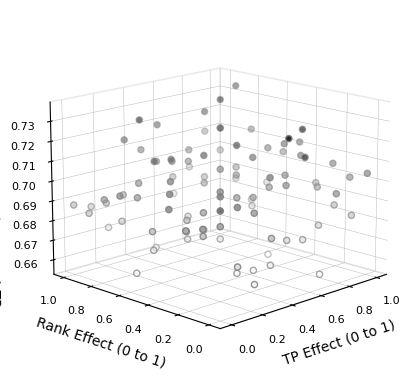

A more ambitious target could be set at 91.37493778925753, which has a lower probability of being achieved.
A more ambitious target could be set at 73.80448488819049, which has a lower probability of being achieved.
The cumulative level target with a 50% probability of being achieved is 1018.0960788465297
The cumulative level target with a 50% probability of being achieved is 925.0044341725456
McNemar's test statistic: 71.89519650655022
P-value: 2.269356972495126e-17
Cohen's d effect size: 0.10274028751541206
95% Confidence Interval for Cohen's d: (0.07487461849746213, 0.130605956533362)
Vanilla PV 1796.90
SLB PV: 1807.24
SLB + Transition Plan PV: 1805.15
PV SLB Step-up A: 23.94 bps
PV SLB Step-up B: 20.69 bps
PV SLB + Transition Plan Step-up A: 24.04 bps
PV SLB + Transition Plan Step-up B:  17.17 bps
Standard Model - RMSE: 4.25669820959012, MAE: 3.002030679948328
Transition Model - RMSE: 4.435914305344982, MAE: 4.110467355121866


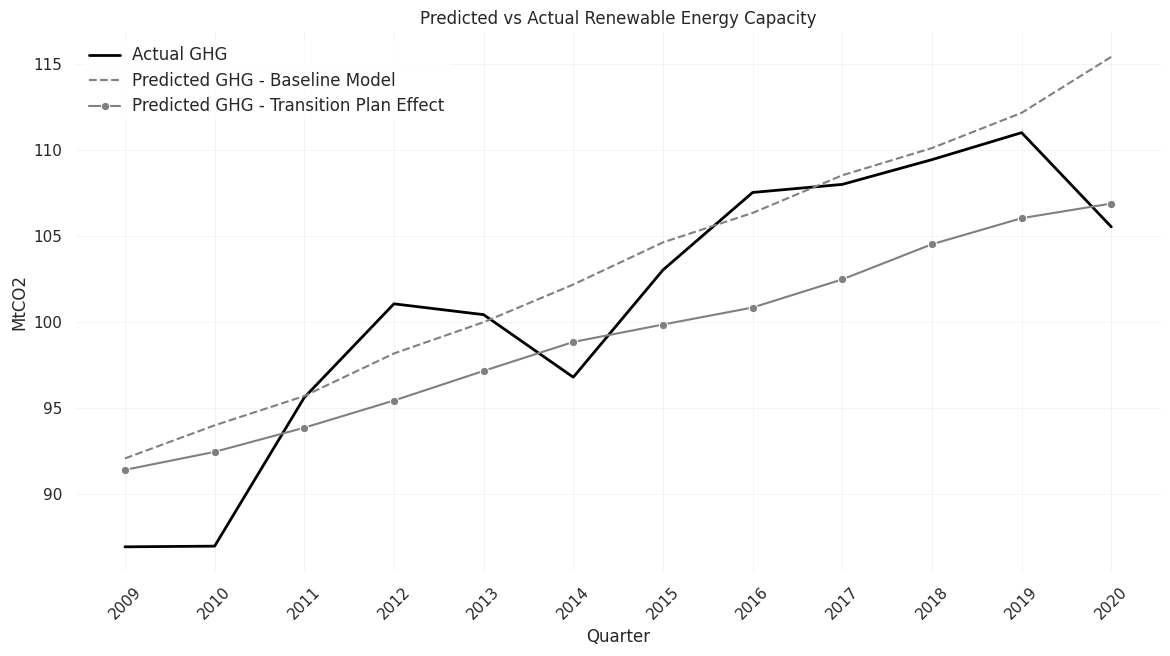

Standard Model Residuals:
Mean: -2.2495, Standard Deviation: 3.6138
Skewness: -0.6969, Kurtosis: -0.5424


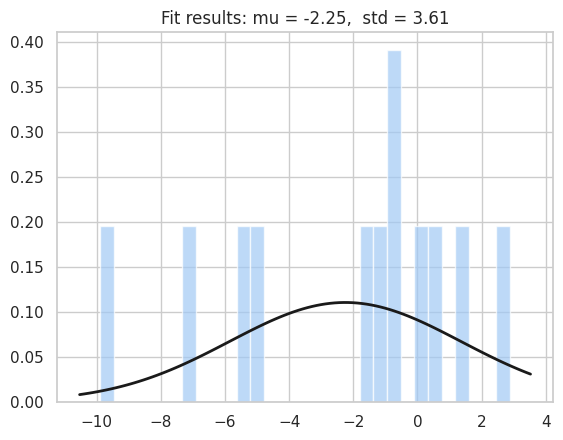

Transition Model Residuals:
Mean: 1.8820, Standard Deviation: 4.0169
Skewness: -0.6132, Kurtosis: -1.0709


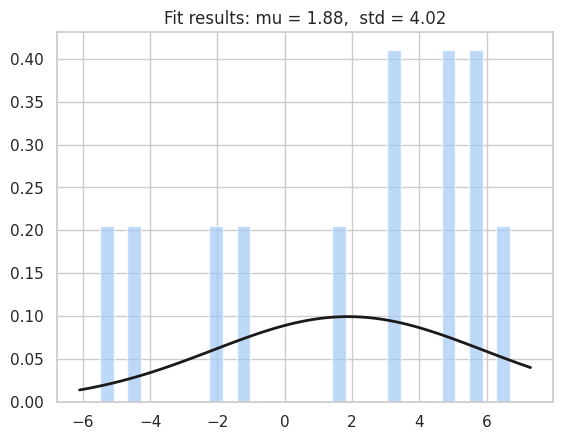

            mean         std       min           max
100    70.082622  233.084048  0.057828   2148.815993
1000   88.592838  337.452439  0.014377   5827.684206
5000   90.624533  423.009975  0.002083  15066.346321
10000  84.472789  343.183874  0.000343  11271.699108


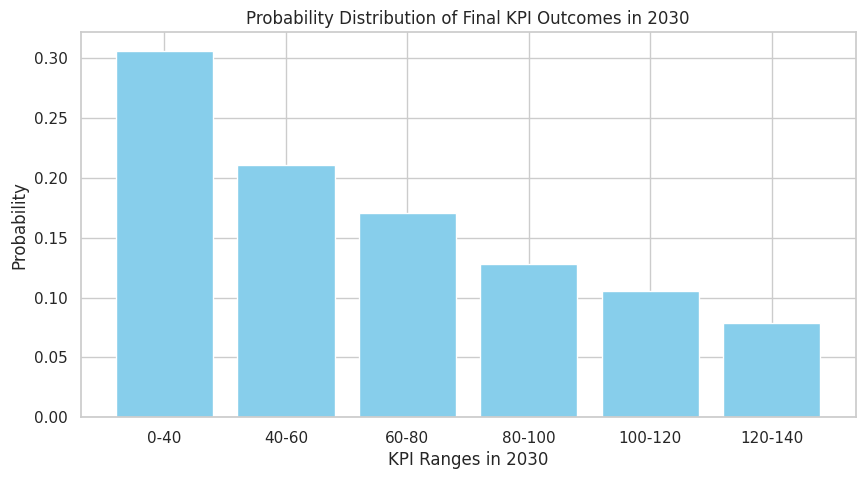

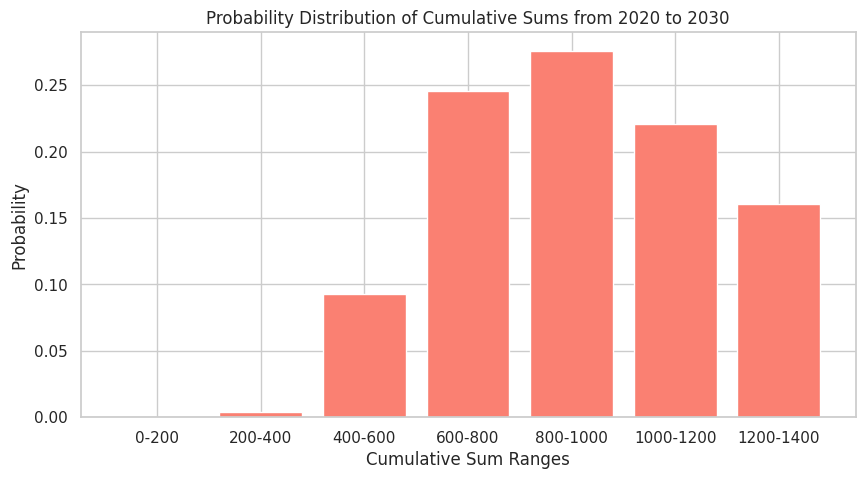

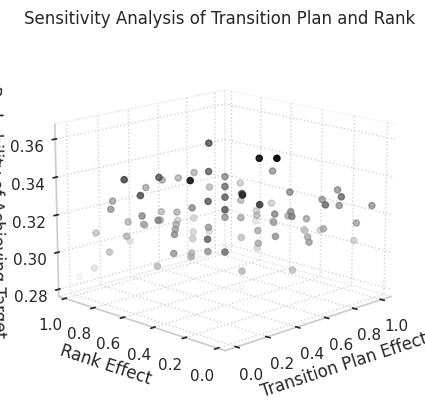

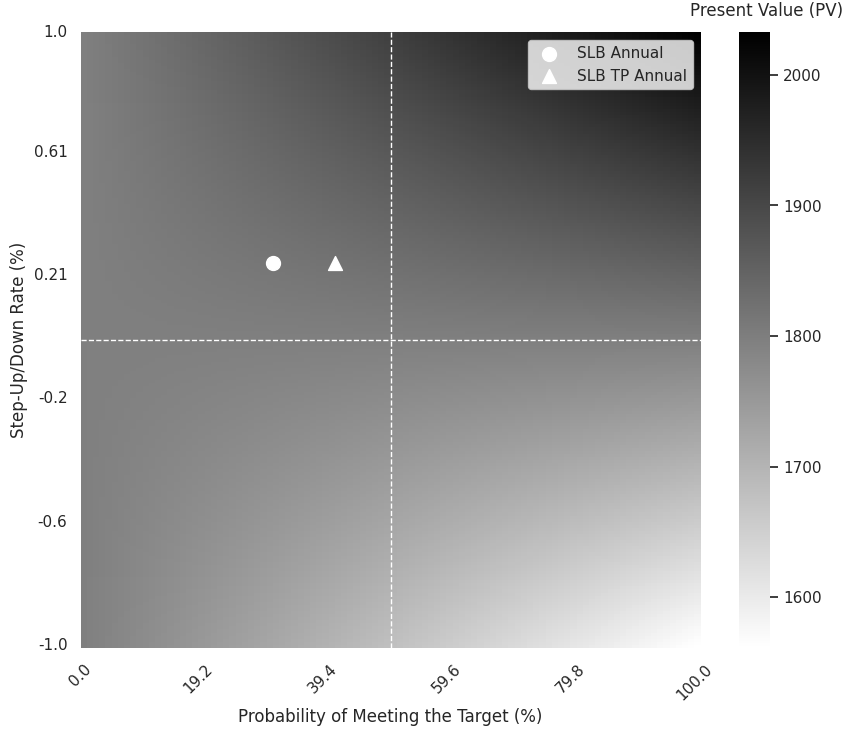

In [2]:
######################################################################################################################################################
######################################################################################################################################################

# CHILE GHG

######################################################################################################################################################
######################################################################################################################################################

np.random.seed(41)

# Constants and input data initialization
face_value = 2000
coupon_rate = 0.0434
coupon_payment = face_value * coupon_rate
issuance_date, maturity_date = 2022, 2042
maturity_years = 20
target_kpi, target_date = 95, "2030"
cumulative_target = 1100
step_up_rate = 0.00125
step_up_rate_b = 0.00125
ytm_percentage = 5.16
annual_discount_rate = ytm_percentage / 100
ytm_annual = 0.0516

historical_kpi = np.array([
    48.82, 47.11, 49.07, 51.77, 54.52, 57.66, 63.31, 69.82, 70.88, 73.88,
    71.50, 69.96, 71.15, 72.18, 77.73, 78.76, 80.68, 90.00, 90.16, 86.93,
    86.97, 95.62, 101.07, 100.44, 96.80, 103.04, 107.55, 108.02, 109.46, 111.03,
    105.55
])

# Generate date range for the historical data
start_year = 1990
end_year = 2020
years = pd.period_range(start=f'{start_year}', end=f'{end_year}', freq='A')
years_datetime = pd.to_datetime(years.astype(str))

# Generating future dates for the next decade from 2021 to 2030
future_dates = pd.period_range(start='2021', end='2030', freq='A')
future_dates_datetime = pd.to_datetime(future_dates.astype(str))
all_years_datetime = pd.to_datetime(years.append(future_dates).astype(str))
num_years_to_target = len(pd.period_range(start=start_year, end=target_date, freq='A')) - 1


##############################################################################################################################
# ADAPTED HESTON MODEL



def mean_reversion(kpi):
    log_data = np.log(kpi)
    returns = np.diff(log_data) * 10
    garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='skewt')
    garch_fit = garch_model.fit(disp='off')
    omega = garch_fit.params['omega']
    alpha = garch_fit.params['alpha[1]']
    beta = garch_fit.params['beta[1]']
    conditional_volatility = garch_fit.conditional_volatility
    variances = conditional_volatility**2
    xi = np.mean(variances)
    rho = np.corrcoef(returns[:-1], variances[1:])[0, 1]

    if alpha + beta < 1:
        theta = omega / (1 - alpha - beta)
        kappa = 1 - alpha - beta
        return theta, kappa, xi, rho
    else:
        print("Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.")
        return None, None

def monte_carlo_simulation(M, N, dt, drift, kappa, theta, xi, rho, initial_value, initial_variance):
    S = np.zeros((M, N + 1))
    V = np.zeros((M, N + 1))
    S[:, 0] = initial_value
    V[:, 0] = initial_variance
    for t in range(1, N + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * np.sqrt(dt) * z1, 0)
        S[:, t] = S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2)
    return S


log_returns = np.diff(np.log(historical_kpi))
drift = np.mean(np.diff(np.log(historical_kpi[-5:])))
volatility = np.std(log_returns)
theta, kappa, xi, rho = mean_reversion(historical_kpi)



# Monte Carlo simulation settings
M = 10000
N = len(future_dates)
dt = 0.6
S = monte_carlo_simulation(M, N, dt, drift, kappa, theta, xi, rho, historical_kpi[-1], volatility)

# Output results
target_kpi = 95
target_date = '2030'
target_date_period = pd.Period(target_date, freq='A')
index_target = np.where(future_dates == target_date_period)[0][0]
print(f"Drift: {drift}")
print(f"Initial Variance: {volatility}")
print(f"Mean Reversion Level for the Variance: {theta}")
print(f"Volatility of Variance: {xi}")
print(f"Mean Reversion Speed for the Variance: {kappa}")
print(f"Estimated rho: {rho}")

# Calculate cumulative sum from 2020 to 2030
probability_level = np.mean(S[:, -1] <= 95)
cumulative_sum = np.sum(S, axis=1)
probability_cumulative = np.mean(cumulative_sum <= 1100)
probability_of_achieving_target = np.mean((S[:, -1] <= 95) & (cumulative_sum <= 1100))


print(f"Probability of KPI ≤ {target_kpi} by 2030: {probability_level:.2%}")
print(f"Probability of cumulative KPI ≤ {cumulative_target} from 2020 to 2030: {probability_cumulative:.2%}")
print(f"Probability of achieving both targets: {probability_of_achieving_target:.2%}")
probability_of_not_achieving_target = 1 - probability_of_achieving_target

probability_of_achieving_target_b = 0.5862
probability_of_not_achieving_target_b = 1 - probability_of_achieving_target_b

overall_probability = probability_of_achieving_target * probability_of_achieving_target_b
print(f"Overall probability: {overall_probability:.2%}")

slope, intercept, r_value, p_value, std_err = stats.linregress(cumulative_sum, S[:, -1])
print(f"R-squared: {r_value**2:.2f}")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

###################################################################################################################################################################
# HESTON MODEL + TRANSITION PLAN

# Parameters and Initialization
transition_plan = 7
TP_min, TP_max = 0, 9
rank, total_peers = 2, 40

def adjust_parameters(transition_plan, TP_min, TP_max, rank, total_peers, mu0, v0):
    tp_effect = (1-((transition_plan - TP_min) / (TP_max - TP_min)))
    adjusted_volatility = v0 * tp_effect

    rank_effect = ((total_peers + 1 - rank) / (total_peers + 1))
    adjusted_drift = mu0 * rank_effect

    return adjusted_drift, adjusted_volatility

# Adjust parameters based on transition plan and rank
adjusted_drift, adjusted_volatility = adjust_parameters(transition_plan, TP_min, TP_max, rank, total_peers, drift, volatility)

# Monte Carlo simulation settings
S_tp = monte_carlo_simulation(M, N, 1, adjusted_drift, kappa, theta, xi, rho, historical_kpi[-1], adjusted_volatility)
# Calculate cumulative sum from 2020 to 2030
cumulative_sum_tp = np.sum(S_tp, axis=1)

# Calculate probabilities
probability_level_tp = np.mean(S_tp[:, -1] <= target_kpi)
probability_cumulative_tp = np.mean(cumulative_sum_tp <= cumulative_target)
probability_of_achieving_target_tp = np.mean((S_tp[:, -1] <= target_kpi) & (cumulative_sum_tp <= cumulative_target))

print(f"Probability of KPI ≤ {target_kpi} by 2030 considering Transition Plan: {probability_level_tp:.2%}")
print(f"Probability of cumulative KPI ≤ {cumulative_target} from 2020 to 2030 considering Transition Plan: {probability_cumulative_tp:.2%}")
print(f"Probability of achieving both targets considering Transition Plan: {probability_of_achieving_target_tp:.2%}")
probability_of_not_achieving_target_tp = 1 - probability_of_achieving_target_tp
print(f"Adjusted Drift: {adjusted_drift}")
print(f"Adjusted Initial Variance: {adjusted_volatility}")

probability_of_achieving_target_b_tp = 0.7044
probability_of_not_achieving_target_b_tp = 1 - probability_of_achieving_target_b_tp

overall_probability_tp = probability_of_achieving_target_tp * probability_of_achieving_target_b_tp
print(f"Overall probability TP: {overall_probability_tp:.2%}")

###################################################################################################################################################################
#SENSITIVITY

# Adjusted function to calculate probabilities within the range 0 to 1 for tp_effect and rank_effect
def calculate_probability_within_range(tp_effect, rank_effect, kappa, theta, xi, rho, initial_value, volatility, drift):
    adjusted_drift = drift * rank_effect
    adjusted_volatility = volatility * tp_effect
    S_tp = monte_carlo_simulation(1000, N, 1, adjusted_drift, kappa, theta, xi, rho, initial_value, adjusted_volatility)
    cumulative_sum_tp = np.sum(S_tp, axis=1)
    probability_level_tp = np.mean(S_tp[:, -1] <= target_kpi)
    probability_cumulative_tp = np.mean(cumulative_sum_tp <= cumulative_target)
    probability_both_tp = np.mean((S_tp[:, -1] <= target_kpi) & (cumulative_sum_tp <= cumulative_target))
    return probability_level_tp

# Grid of tp and rank effects
tp_effects = np.linspace(0, 1, 10)
rank_effects = np.linspace(0, 1, 10)

# Compute meshgrid for tp and rank effects
TP, RANK = np.meshgrid(tp_effects, rank_effects)

# Storage for new probabilities
new_probabilities = np.zeros(TP.shape)

# Compute new probabilities for each combination within the range 0 to 1
for i in range(TP.shape[0]):
    for j in range(TP.shape[1]):
        new_probabilities[i, j] = calculate_probability_within_range(TP[i, j], RANK[i, j], kappa, theta, xi, rho, historical_kpi[-1], volatility, drift)

# Flatten arrays for plotting
tp_flat = TP.flatten()
rank_flat = RANK.flatten()
prob_flat = new_probabilities.flatten()

# Plotting the adjusted scatter plot
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(tp_flat, rank_flat, prob_flat, c=prob_flat, cmap='Greys', edgecolors='grey')

ax.set_xlabel('TP Effect (0 to 1)')
ax.set_ylabel('Rank Effect (0 to 1)')
ax.set_zlabel('Probability of Achieving Target TP')

ax.view_init(elev=15, azim=225)  # You can adjust these angles as needed

ax.set_xlabel('TP Effect (0 to 1)')
ax.set_ylabel('Rank Effect (0 to 1)')
ax.set_zlabel('Probability of Achieving Target TP')

ax.view_init(elev=15, azim=225)  # You can adjust these angles as needed

# Set background and grid colors
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.w_xaxis.pane.set_edgecolor('lightgrey')
ax.w_yaxis.pane.set_edgecolor('lightgrey')
ax.w_zaxis.pane.set_edgecolor('lightgrey')

# Adjust grid lines directly in 3D
ax.xaxis._axinfo["grid"]['linewidth'] = 0.3
ax.yaxis._axinfo["grid"]['linewidth'] = 0.3
ax.zaxis._axinfo["grid"]['linewidth'] = 0.3
ax.grid(True, linestyle='--', color='lightgrey')

ax.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size for ticks

plt.show()


##########################################################################################################################
# AMBITION OT TARGETS

target_quarter_index = future_dates.get_loc(target_date)
# Sort the simulated outcomes for the target quarter
sorted_outcomes = np.sort(S[:, target_quarter_index])
# If you want a value that is less likely to be achieved, look for a higher percentile
more_ambitious_target = np.percentile(sorted_outcomes, 60) # 60% probability
print(f"A more ambitious target could be set at {more_ambitious_target}, which has a lower probability of being achieved.")

# Sort the simulated outcomes for the target quarter
sorted_outcomes_tp = np.sort(S_tp[:, target_quarter_index])
# If you want a value that is less likely to be achieved, look for a higher percentile
more_ambitious_target_tp = np.percentile(sorted_outcomes_tp, 60) # 60% probability
print(f"A more ambitious target could be set at {more_ambitious_target_tp}, which has a lower probability of being achieved.")


# Sort the cumulative sums
sorted_cumulative_sums = np.sort(cumulative_sum)
# Find the median of these sorted cumulative sums to get the 50th percentile
cumulative_target_50_percentile = np.percentile(sorted_cumulative_sums, 50)
# Print the result
print(f"The cumulative level target with a 50% probability of being achieved is {cumulative_target_50_percentile}")

# Sort the cumulative sums
sorted_cumulative_sums = np.sort(cumulative_sum_tp)
# Find the median of these sorted cumulative sums to get the 50th percentile
cumulative_target_50_percentile = np.percentile(sorted_cumulative_sums, 50)
# Print the result
print(f"The cumulative level target with a 50% probability of being achieved is {cumulative_target_50_percentile}")

###################################################################################################################################################################
# DIFFERENCE TEST

S = np.random.choice([0, 1], p=[1-probability_cumulative, probability_cumulative], size=10000)
S_tp = np.random.choice([0, 1], p=[1-probability_cumulative_tp, probability_cumulative_tp], size=10000)

table = [[np.sum((S == 0) & (S_tp == 0)), np.sum((S == 0) & (S_tp == 1))],
         [np.sum((S == 1) & (S_tp == 0)), np.sum((S == 1) & (S_tp == 1))]]

result = mcnemar(table, exact=False, correction=True)
print("McNemar's test statistic:", result.statistic)
print("P-value:", result.pvalue)

# Cohen's d calculation based on your formula
d = (probability_cumulative_tp - probability_cumulative) / np.sqrt(
    (probability_cumulative * (1 - probability_cumulative) +
     probability_cumulative_tp * (1 - probability_cumulative_tp)) / 2)

def compute_confidence_interval_d(d, nx, ny, alpha=0.05):
    # Compute the degrees of freedom
    dof = nx + ny - 2
    # Calculate the critical t value
    t_crit = stats.t.ppf(1 - alpha/2, dof)
    # Standard error calculation for Cohen's d in the context of proportions
    sed = np.sqrt((2 * (1 + d ** 2 / 2)) / nx + d ** 2 / nx)
    # Confidence interval calculation
    ci_lower = d - t_crit * sed
    ci_upper = d + t_crit * sed
    return ci_lower, ci_upper

# Number of samples in each group (assume same size for simplicity)
nx = ny = 10000

# Compute confidence intervals
ci_lower, ci_upper = compute_confidence_interval_d(d, nx, ny)

# Print outputs
print(f"Cohen's d effect size: {d}")
print(f"95% Confidence Interval for Cohen's d: ({ci_lower}, {ci_upper})")

##############################################################################################################################
# SLB VALUATION

def calculate_bond_pv(face_value, coupon_rate, ytm, n_periods, frequency):
    coupon_payment = face_value * coupon_rate / frequency
    r = ytm / frequency
    n = maturity_years * frequency

    # Calculate the present value of the coupon payments
    pv_coupons = sum(coupon_payment / ((1 + r) ** t) for t in range(1, n + 1))

    # Calculate the present value of the face value
    pv_face_value = face_value / ((1 + r) ** n)

    # Total present value of the bond
    return pv_coupons + pv_face_value


# Semi-annual payments
pv_semi_annual = calculate_bond_pv(face_value, coupon_rate, ytm_annual, 2, 2)
print(f"Vanilla PV {pv_semi_annual:.2f}")


def calculate_sustainability_linked_bond_pv(face_value, coupon_rate, ytm, maturity_years, frequency, step_up_year, step_up_rate_a, step_up_rate_b, prob_a, prob_b):
    coupon_payment = face_value * coupon_rate / frequency
    r = ytm / frequency
    n = maturity_years * frequency
    step_up_period = (step_up_year - issuance_date) * frequency

    # Calculate the present value of the coupon payments before step-up
    pv_coupons_pre_step_up = sum(coupon_payment / ((1 + r) ** t) for t in range(1, step_up_period + 1))

    # Adjusted coupon payments after step-up
    adjusted_coupon_payment = (
        coupon_payment +
        face_value * step_up_rate_a * (prob_a) / frequency +
        face_value * step_up_rate_b * (prob_b) / frequency
    )

    # Calculate the present value of the coupon payments after step-up
    pv_coupons_post_step_up = sum(adjusted_coupon_payment / ((1 + r) ** t) for t in range(step_up_period + 1, n + 1))

    # Calculate the present value of the face value
    pv_face_value = face_value / ((1 + r) ** n)

    # Total present value of the bond
    return pv_coupons_pre_step_up + pv_coupons_post_step_up + pv_face_value

# SLB Valuation
pv_sustainability_linked = calculate_sustainability_linked_bond_pv(
    face_value=2000, coupon_rate=0.0434, ytm=ytm_annual, maturity_years=20, frequency=2,
    step_up_year=2032, step_up_rate_a=0.00125, step_up_rate_b=0.00125,
    prob_a=probability_of_not_achieving_target, prob_b=probability_of_not_achieving_target_b
)

print(f"SLB PV: {pv_sustainability_linked:.2f}")

# SLB Valuation + Transition Plan

pv_sustainability_linked = calculate_sustainability_linked_bond_pv(
    face_value=2000, coupon_rate=0.0434, ytm=ytm_annual, maturity_years=20, frequency=2,
    step_up_year=2032, step_up_rate_a=0.00125, step_up_rate_b=0.00125,
    prob_a=probability_of_not_achieving_target_b, prob_b=probability_of_not_achieving_target_b_tp
)

print(f"SLB + Transition Plan PV: {pv_sustainability_linked:.2f}")

def calculate_step_ups_bps(face_value, coupon_rate, ytm, maturity_years, frequency, step_up_year, step_up_rate_a, step_up_rate_b, prob_a, prob_b, issuance_date):
    r = ytm / frequency
    n = maturity_years * frequency
    step_up_period = (step_up_year - issuance_date) * frequency

    # Calculate the base present value of the bond
    base_coupon_payment = face_value * coupon_rate / frequency
    pv_base = sum(base_coupon_payment / ((1 + r) ** t) for t in range(1, n + 1)) + (face_value / ((1 + r) ** n))

    # Incremental coupon payments for step-ups
    incremental_coupon_a = face_value * step_up_rate_a / frequency
    incremental_coupon_b = face_value * step_up_rate_b / frequency

    # Present value of incremental coupon payments
    pv_incremental_a = sum(incremental_coupon_a / ((1 + r) ** t) for t in range(step_up_period + 1, n + 1))
    pv_incremental_b = sum(incremental_coupon_b / ((1 + r) ** t) for t in range(step_up_period + 1, n + 1))

    # Convert differences to basis points
    bps_a = ((pv_incremental_a * prob_a) / face_value) * 10000
    bps_b = ((pv_incremental_b * prob_b) / face_value) * 10000

    return bps_a, bps_b

# SLB STEP-UP
issuance_date = 2022  # Example issuance date
bps_a, bps_b = calculate_step_ups_bps(
    face_value=2000, coupon_rate=0.0434, ytm=ytm_annual, maturity_years=20, frequency=2,
    step_up_year=2032, step_up_rate_a=0.00125, step_up_rate_b=0.00125,
    prob_a=probability_of_not_achieving_target_tp, prob_b=0.3561, issuance_date=issuance_date
)

print(f"PV SLB Step-up A: {bps_a:.2f} bps")
print(f"PV SLB Step-up B: {bps_b:.2f} bps")


# SLB + Transition Plan STEP-UP
issuance_date = 2022  # Example issuance date
bps_a, bps_b = calculate_step_ups_bps(
    face_value=2000, coupon_rate=0.0434, ytm=ytm_annual, maturity_years=20, frequency=2,
    step_up_year=2032, step_up_rate_a=0.00125, step_up_rate_b=0.00125,
    prob_a=probability_of_not_achieving_target_b, prob_b=probability_of_not_achieving_target_b_tp, issuance_date=issuance_date
)

print(f"PV SLB + Transition Plan Step-up A: {bps_a:.2f} bps")
print(f"PV SLB + Transition Plan Step-up B:  {bps_b:.2f} bps")


###################################################################################################################################################################
#BACKTESTING

# Historical data split
historical_kpi_train, historical_kpi_test = historical_kpi[:19], historical_kpi[19:]
drift_bt = np.mean(np.diff(np.log(historical_kpi)))
rank_effect = ((total_peers + 1 - rank) / (total_peers + 1))
adjusted_drift_bt = drift_bt * rank_effect

def run_simulation(historical_data, forecast_length, drift, volatility, kappa, theta, xi, rho, dt=0.8):
    M = 10000
    S, V = np.zeros((M, forecast_length + 1)), np.zeros((M, forecast_length + 1))
    S[:, 0], V[:, 0] = historical_data[-1], volatility
    for t in range(1, forecast_length + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * dt * z1, 0)
        S[:, t] = S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2)
    return S[:, 1:]  # Skip the initial value, focusing only on the forecasted quarters

def run_simulation_tp(historical_data, forecast_length, drift, volatility, kappa, theta, xi, rho, dt=0.6):
    M = 10000
    S, V = np.zeros((M, forecast_length + 1)), np.zeros((M, forecast_length + 1))
    S[:, 0], V[:, 0] = historical_data[-1], volatility
    for t in range(1, forecast_length + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * dt * z1, 0)
        S[:, t] = S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2)
    return S[:, 1:]  # Skip the initial value, focusing only on the forecasted quarters



# Standard Model Predictions
predicted_kpi_standard = run_simulation(historical_kpi_train, len(historical_kpi_test), drift_bt, volatility, kappa, theta, xi, rho)
mean_predictions_standard = np.mean(predicted_kpi_standard, axis=0)

# Transition Model Predictions
predicted_kpi_transition = run_simulation_tp(historical_kpi_train, len(historical_kpi_test), adjusted_drift_bt, adjusted_volatility, kappa, theta, xi, rho)
mean_predictions_transition = np.mean(predicted_kpi_transition, axis=0)

# Evaluation
def evaluate_predictions(predictions, actuals):
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    return rmse, mae

rmse_standard, mae_standard = evaluate_predictions(mean_predictions_standard, historical_kpi_test)
rmse_transition, mae_transition = evaluate_predictions(mean_predictions_transition, historical_kpi_test)
print(f"Standard Model - RMSE: {rmse_standard}, MAE: {mae_standard}")
print(f"Transition Model - RMSE: {rmse_transition}, MAE: {mae_transition}")

# Adjusting the x-axis to have all 12 quarter labels
quarters = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
predicted_standard = mean_predictions_standard.tolist()  # Convert your predictions to list if they are not already
predicted_transition = mean_predictions_transition.tolist()
actual_capacity = historical_kpi_test.tolist()

# Now create a DataFrame with this data
df = pd.DataFrame({
    'Quarter': quarters,
    'Predicted_Standard': predicted_standard,
    'Predicted_Transition': predicted_transition,
    'Actual': actual_capacity
})

# Set up the background and gridline colors
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(14, 7))

# Customize the grid
ax = sns.lineplot(x='Quarter', y='Actual', data=df, color='black', label='Actual GHG', linewidth=2)
sns.lineplot(x='Quarter', y='Predicted_Standard', data=df, color='grey', label='Predicted GHG - Baseline Model', linestyle='--')
sns.lineplot(x='Quarter', y='Predicted_Transition', data=df, color='grey', label='Predicted GHG - Transition Plan Effect', marker='o')

# Further customize with matplotlib
ax.set_facecolor('white')  # Set the background color to white
ax.grid(True, which='both', color='#f0f0f0', linestyle='-', linewidth=0.5)

# Set labels and title
ax.set(xlabel='Quarter', ylabel='MtCO2')
ax.set_title('Predicted vs Actual Renewable Energy Capacity')

# Set the rotation for the x-ticks
plt.setp(ax.get_xticklabels(), rotation=45)

# Remove the spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust the legend to remove the box outline
leg = ax.legend(facecolor='white', edgecolor='none')  # Remove the legend box outline

# Adjust the legend
plt.setp(ax.get_legend().get_texts(), fontsize='12')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14')  # for legend title

# Show the plot
plt.show()

# Convert lists to numpy arrays if they aren't already
predicted_standard = np.array(predicted_standard)
predicted_transition = np.array(predicted_transition)
actual_capacity = np.array(actual_capacity)

# Assuming you have arrays: predicted_standard, predicted_transition, and actual_capacity
residuals_standard = actual_capacity - predicted_standard
residuals_transition = actual_capacity - predicted_transition

def analyze_residuals(residuals, model_name):
    # Compute basic statistics
    mean_res = np.mean(residuals)
    std_res = np.std(residuals)
    skew_res = skew(residuals)
    kurt_res = kurtosis(residuals)

    print(f"{model_name} Model Residuals:")
    print(f"Mean: {mean_res:.4f}, Standard Deviation: {std_res:.4f}")
    print(f"Skewness: {skew_res:.4f}, Kurtosis: {kurt_res:.4f}")

    # Plotting the histogram of the residuals
    plt.hist(residuals, bins=30, alpha=0.7, label=f'{model_name} Residuals', density=True)
    # Plotting the normal distribution with the same mean and std
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean_res, std_res)
    plt.plot(x, p, 'k', linewidth=2)
    title = f"Fit results: mu = {mean_res:.2f},  std = {std_res:.2f}"
    plt.title(title)
    plt.show()

# Analyze the residuals for both models
analyze_residuals(residuals_standard, "Standard")
analyze_residuals(residuals_transition, "Transition")

##########################################################################################################################
# MONTE CARLO CONVERGENCE ANALYSIS

# Parameters for the simulation (derived from the historical data)
last_observed_value = 105.6
# Different numbers of paths for Monte Carlo convergence testing
Ms = [100, 1000, 5000, 10000]

convergence_results = pd.DataFrame(index=Ms, columns=['mean', 'std', 'min', 'max'])

for M in Ms:
    S = np.zeros((M, num_years_to_target + 1))
    V = np.zeros((M, num_years_to_target + 1))
    S[:, 0] = last_observed_value
    V[:, 0] = volatility

    for t in range(1, num_years_to_target + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * np.sqrt(dt) * z1, 0)
        S[:, t] = S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2)

    convergence_results.loc[M, 'mean'] = np.mean(S[:, -1])
    convergence_results.loc[M, 'std'] = np.std(S[:, -1])
    convergence_results.loc[M, 'min'] = np.min(S[:, -1])
    convergence_results.loc[M, 'max'] = np.max(S[:, -1])

# Displaying the convergence results in a clean format
print(convergence_results)

##########################################################################################################################
# DISTRIBUTION ANALYSIS

# Calculate probabilities for the final KPI values in 2030
bins_2030 = [0, 40, 60, 80, 100, 120, 140]  # Define ranges for KPI values in 2030
probabilities_2030 = np.histogram(S[:, index_target], bins=bins_2030, density=True)[0] * np.diff(bins_2030)

# Calculate probabilities for cumulative sums from 2020 to 2030
bins_cumulative = [0, 200, 400, 600, 800, 1000, 1200, 1400]  # Define ranges for cumulative sums
probabilities_cumulative = np.histogram(cumulative_sum, bins=bins_cumulative, density=True)[0] * np.diff(bins_cumulative)

# Bin labels should be derived from the bins arrays, excluding the last element
bin_labels_2030 = [f"{bins_2030[i]}-{bins_2030[i+1]}" for i in range(len(bins_2030)-1)]
bin_labels_cumulative = [f"{bins_cumulative[i]}-{bins_cumulative[i+1]}" for i in range(len(bins_cumulative)-1)]

# Plot for the 2030 KPI
plt.figure(figsize=(10, 5))
plt.bar(bin_labels_2030, probabilities_2030, color='skyblue')
plt.title('Probability Distribution of Final KPI Outcomes in 2030')
plt.xlabel('KPI Ranges in 2030')
plt.ylabel('Probability')
plt.show()

# Plot for cumulative sums from 2020 to 2030
plt.figure(figsize=(10, 5))
plt.bar(bin_labels_cumulative, probabilities_cumulative, color='salmon')
plt.title('Probability Distribution of Cumulative Sums from 2020 to 2030')
plt.xlabel('Cumulative Sum Ranges')
plt.ylabel('Probability')
plt.show()


##############################################################################################################################
# 3D SCATTER
##############################################################################################################################


# Constants
M = 1000  # Reduced number for quicker computation
N = len(future_dates)
dt = 1
target_date_period = pd.Period(target_date, freq='Q')


# Define ranges for transition_plan and rank
transition_plan = 7
TP_min, TP_max = 0, 9
rank, total_peers = 2, 40
transition_plans = np.linspace(TP_min, TP_max, 10)  # Vary transition_plan in 10 steps
ranks = np.linspace(1, total_peers, 10)  # Vary rank in 10 steps

# Store results
tp_effects = []
rank_effects = []
probabilities = []

for transition_plan in transition_plans:
    for rank in ranks:
        adjusted_drift, adjusted_volatility = adjust_parameters(transition_plan, TP_min, TP_max, int(rank), total_peers, drift, volatility)
        S_tp = monte_carlo_simulation(M, N, dt, adjusted_drift, kappa, theta, xi, rho, historical_kpi[-1], adjusted_volatility)
        probability_of_achieving_target_tp = np.mean(S_tp[:, index_target] >= target_kpi)

        # Calculate tp_effect and rank_effect for plotting
        tp_effect = (1 - ((transition_plan - TP_min) / (TP_max - TP_min)))
        rank_effect = ((total_peers + 1 - rank) / (total_peers + 1))

        # Append results for plotting
        tp_effects.append(tp_effect)
        rank_effects.append(rank_effect)
        probabilities.append(probability_of_achieving_target_tp)

# Plotting
fig = plt.figure(facecolor='white')  # Set the background to white
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(tp_effects, rank_effects, probabilities, c=probabilities, cmap='gray_r')

# Set labels and title
ax.set_xlabel('Transition Plan Effect')
ax.set_ylabel('Rank Effect')
ax.set_zlabel('Probability of Achieving Target')
plt.title('Sensitivity Analysis of Transition Plan and Rank')

# Set the viewing angle to be lower.
# 'elev' controls the elevation angle in the z plane.
# 'azim' controls the azimuth angle in the x,y plane.
ax.view_init(elev=15, azim=225)  # You can adjust these angles as needed

# Remove the grid and pane colors for a cleaner look
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
# Customize grid lines to be light grey and dotted
ax.xaxis._axinfo["grid"]['color'] =  '#D3D3D3'  # Light grey
ax.yaxis._axinfo["grid"]['color'] =  '#D3D3D3'
ax.zaxis._axinfo["grid"]['color'] =  '#D3D3D3'
ax.xaxis._axinfo["grid"]['linestyle'] = ":"  # Dotted line
ax.yaxis._axinfo["grid"]['linestyle'] = ":"
ax.zaxis._axinfo["grid"]['linestyle'] = ":"

# Show the plot
plt.show()

##############################################################################################################################
# VALUATION PLOT
##############################################################################################################################

# Function to calculate PV for a given step-up rate and probability
def calculate_pv_for_scenario(face_value, coupon_rate, ytm, maturity_years, frequency, step_up_year, step_up_rate_a, step_up_rate_b, prob_a, prob_b):
    coupon_payment = face_value * coupon_rate / frequency
    r = ytm / frequency
    n = maturity_years * frequency
    step_up_period = (step_up_year - issuance_date) * frequency

    pv_coupons_pre_step_up = sum(coupon_payment / ((1 + r) ** t) for t in range(1, step_up_period + 1))
    adjusted_coupon_payment = (
        coupon_payment +
        face_value * step_up_rate_a * (prob_a) / frequency +
        face_value * step_up_rate_b * (prob_b) / frequency
    )
    pv_coupons_post_step_up = sum(adjusted_coupon_payment / ((1 + r) ** t) for t in range(step_up_period + 1, n + 1))
    pv_face_value = face_value / ((1 + r) ** n)
    pv = pv_coupons_pre_step_up + pv_coupons_post_step_up + pv_face_value
    return pv


# Grid of step-up rates and probabilities
step_up_rates = np.linspace(0.01, -0.01, 200)  # From -1% to 1%
probabilities = np.linspace(0, 1, 100)  # From 0% to 100%

# Initialize the PVs arrayPVs = np.zeros((len(step_up_rates), len(probabilities)))
PVs = np.zeros((len(step_up_rates), len(probabilities)))

# Populate the PVs array
for i, rate in enumerate(step_up_rates):
    for j, prob in enumerate(probabilities):
        PVs[i, j] = calculate_pv_for_scenario(
            face_value, coupon_rate, ytm_annual, maturity_years, frequency=2,
            step_up_year=2030, step_up_rate_a=rate, step_up_rate_b=rate,
            prob_a=prob, prob_b=prob
        )

# Function to find the index for the given probability and step_up_rate
def find_index(probability, step_up_rate, step_up_rates, probabilities):
    prob_index = np.searchsorted(probabilities, probability, side="left")
    # Since the array is inverted, we need to calculate the inverted index
    rate_index = len(step_up_rates) - np.searchsorted(step_up_rates[::-1], step_up_rate, side="right")
    return rate_index, prob_index


# Assuming pv_slb_annual and pv_slb_tp_annual have been calculated above
# and probability_of_achieving_target, probability_of_achieving_target_tp and step_up_rate are given
index_slb_annual = find_index(overall_probability, 0.0025, step_up_rates, probabilities)
index_slb_tp_annual = find_index(overall_probability_tp, 0.0025, step_up_rates, probabilities)

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(PVs, cmap='binary', vmin=np.min(PVs), vmax=np.max(PVs))


# Label the heatmap
ax.set_xlabel('Probability of Meeting the Target (%)')
ax.set_ylabel('Step-Up/Down Rate (%)')

# Set tick locations and labels
probability_ticks = np.linspace(0, len(probabilities)-1, 6).astype(int)
step_up_rate_ticks = np.linspace(0, len(step_up_rates)-1, 6).astype(int)
ax.set_xticks(probability_ticks)
ax.set_xticklabels(np.round(probabilities[probability_ticks]*100, 1), rotation=45)
ax.set_yticks(step_up_rate_ticks)
ax.set_yticklabels(np.round(step_up_rates[step_up_rate_ticks]*100, 2), rotation=0)

# Show the colorbar
colorbar = ax.collections[0].colorbar
colorbar.set_label('Present Value (PV)', labelpad=-40, y=1.05, rotation=0)

# Place the markers
plt.scatter(index_slb_annual[1], index_slb_annual[0], color='white', s=100, label='SLB Annual', marker='o', zorder=5)
plt.scatter(index_slb_tp_annual[1], index_slb_tp_annual[0], color='white', s=100, label='SLB TP Annual', marker='^', zorder=5)

# Add a legend
plt.legend()

# Adding a white dashed horizontal line at 0% step-up rate
zero_rate_index, _ = find_index(0, 0, step_up_rates, probabilities)
ax.axhline(zero_rate_index, color='white', linestyle='--', linewidth=1)

# Adding a white dashed vertical line at 50% probability
fifty_percent_prob_index = np.searchsorted(probabilities, 0.5)
ax.axvline(fifty_percent_prob_index, color='white', linestyle='--', linewidth=1)

plt.show()

# ENEL SLB

<ipython-input-3-10ce808ceffa>:45: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  historical_dates_datetime = pd.to_datetime(date_range.astype(str))
<ipython-input-3-10ce808ceffa>:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  future_dates_datetime = pd.to_datetime(future_dates.astype(str))
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting 

Probability of achieving the Target KPI by 2030Q1: 43.05%
Drift: 0.016091003081564078
Initial Variance: 0.02189461332915734
Mean Reversion Level for the Variance: 0.00012588503251807035
Volatility of Variance: 0.00011781966187000146
Mean Reversion Speed for the Variance: 0.10733072732369098
Estimated rho: 0.4026909460455674
Probability of achieving the Target KPI by 2032Q4 considering transition plan: 53.27%
Adjusted Drift: 0.015391394251930857
Adjusted Initial Variance: 0.0067216462920513045


<ipython-input-3-10ce808ceffa>:198: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.fill = False
<ipython-input-3-10ce808ceffa>:199: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane.fill = False
<ipython-input-3-10ce808ceffa>:200: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.pane.fill = False
<ipython-input-3-10ce808ceffa>:201: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.pane.set_edgecolor('lightgrey')
<ipython-input-3-10ce808ceffa>:202: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.pane.set_

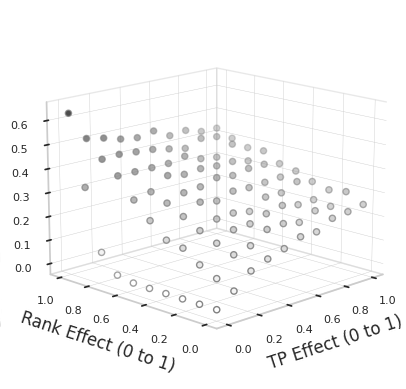

A more ambitious target could be set at 0.7487263179288631, which has a lower probability of being achieved.
A more ambitious target could be set at 0.8142525882906914, which has a lower probability of being achieved.
McNemar's test statistic: 213.8760938743039
P-value: 1.9599629679381587e-48
Cohen's d effect size: 0.2056166430768498
95% Confidence Interval for Cohen's d: (0.17731698404658086, 0.23391630210711872)
Standard Model - RMSE: 0.015626779900087477, MAE: 0.010157980607054121
Transition Model - RMSE: 0.012615363240691633, MAE: 0.010227270051496392


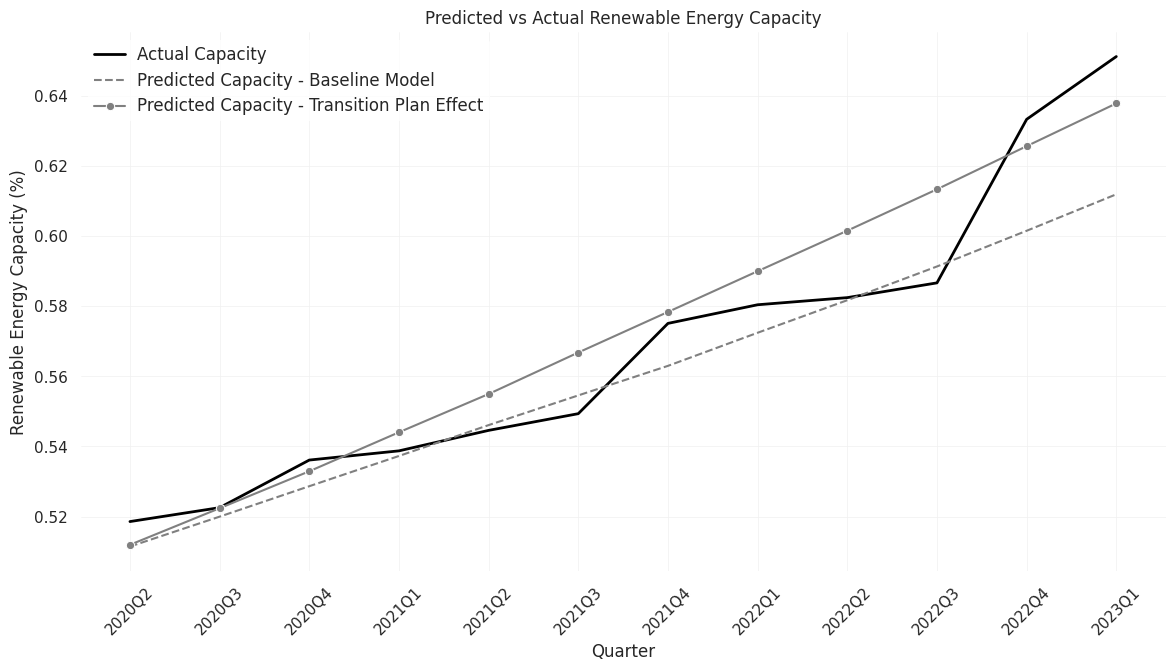

Standard Model Residuals:
Mean: 0.0083, Standard Deviation: 0.0133
Skewness: 1.3015, Kurtosis: 0.5222


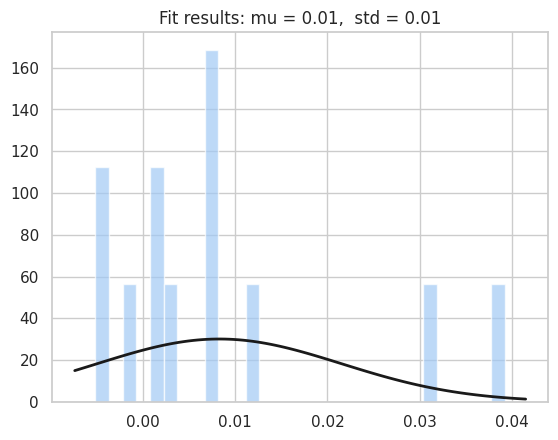

Transition Model Residuals:
Mean: -0.0051, Standard Deviation: 0.0116
Skewness: -0.2379, Kurtosis: -0.9092


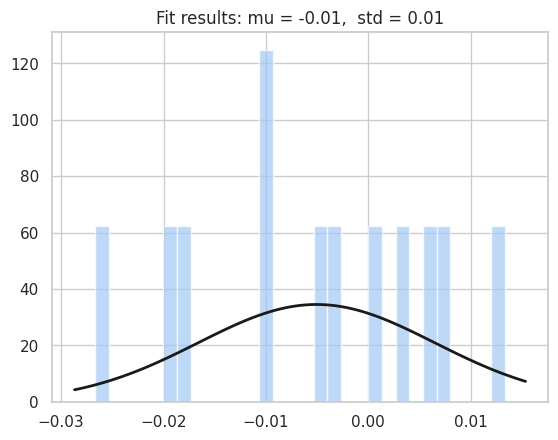

            mean        std        min    max
100    43.938682  19.046403  16.130547  100.0
1000   41.756238  16.730217   9.145845  100.0
5000   42.151822  16.939942   9.561391  100.0
10000  42.155836  16.843853   7.638061  100.0
Vanilla Bond PV 775.03
SLB PV: 782.87
SLB + Transition Plan PV: 781.46
PV SLB Step-up: 111.89 bps
PV SLB + Transition Plan Step-up: 91.81 bps


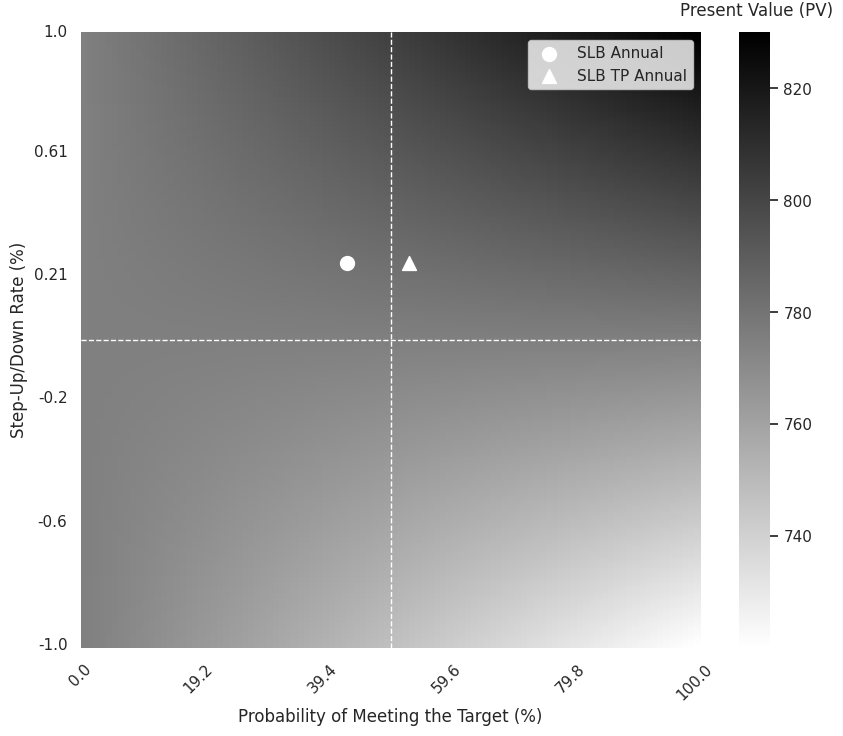

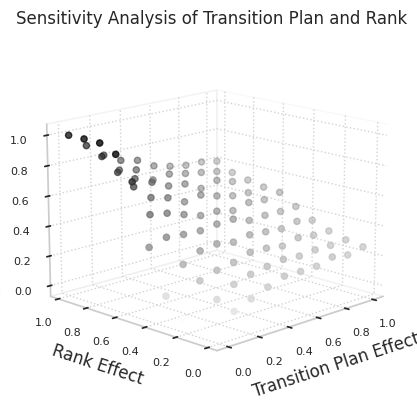

In [3]:
######################################################################################################################################################
######################################################################################################################################################

########   ##    ##    ########    ##
##         ####  ##    ##          ##
####       ## ## ##    ####        ##
##         ##   ###    ##          ##
########   ##    ##    ########    ########

# ENEL REC

######################################################################################################################################################
######################################################################################################################################################

# Ensure reproducibility
np.random.seed(42)

# Constants and input data initialization
face_value = 700
coupon_rate = 0.045
coupon_payment = face_value * coupon_rate
issuance_date, maturity_date = 2023, 2043
maturity_years = 20
step_up_rate = 0.0025
ytm_percentage = 3.373
annual_discount_rate = ytm_percentage / 100
target_date = '2030Q1'
ytm = 0.0373

# Historical quarterly renewable energy capacity data
historical_renewable_energy = np.array([0.38290744, 0.40907582,
    0.40630384, 0.41099488, 0.41267188, 0.4261573, 0.43267088,
    0.43553211, 0.43428198, 0.43505504, 0.4380508, 0.44413041,
    0.45108222, 0.4574235, 0.46074208, 0.45179673, 0.45787199,
    0.46221186, 0.45916642, 0.46199977, 0.49951985, 0.50166387,
    0.51857673, 0.52254823, 0.53611538, 0.53874128, 0.54457876,
    0.54934431, 0.57508787, 0.58040426, 0.5824372, 0.58664315,
    0.63328092, 0.6511867
])


# Generate date range for historical data
start_date, end_date = "2014Q4", "2023Q1"
date_range = pd.period_range(start="2014Q4", end="2023Q1", freq='Q')
historical_dates_datetime = pd.to_datetime(date_range.astype(str))
future_dates = pd.period_range(start=date_range[-1] + 1, end=target_date, freq='Q')
future_dates_datetime = pd.to_datetime(future_dates.astype(str))

sustainability_pledge = np.where(date_range == '2021Q4')[0][0]  # Finding the index for 2021Q4

# Calculate the number of quarters to the target
num_quarters_to_target = len(pd.period_range(start="2023Q2", end=target_date, freq='Q'))



##############################################################################################################################
# ADAPTED HESTON MODEL


def mean_reversion(kpi):
    log_returns = np.diff(np.log(kpi))
    returns = np.diff(kpi, n=1)
    garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='ged')
    garch_fit = garch_model.fit(disp='off')
    omega = garch_fit.params['omega']
    alpha = garch_fit.params['alpha[1]']
    beta = garch_fit.params['beta[1]']
    conditional_volatility = garch_fit.conditional_volatility
    variances = conditional_volatility**2
    xi = np.mean(variances)
    rho = np.corrcoef(log_returns[:-1], variances[1:])[0, 1]

    if alpha + beta < 1:
        theta = omega / (1 - alpha - beta)
        kappa = 1 - alpha - beta
        return theta, kappa, xi, rho
    else:
        print("Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.")
        return None, None

def monte_carlo_simulation(M, N, dt, drift, kappa, theta, xi, rho, initial_value, initial_variance):
    S = np.zeros((M, N + 1))
    V = np.zeros((M, N + 1))
    S[:, 0] = initial_value
    V[:, 0] = initial_variance
    for t in range(1, N + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * np.sqrt(dt) * z1, 0)
        S[:, t] = np.minimum(S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2), 100)
    return S

historical_kpi = historical_renewable_energy
kpi = historical_renewable_energy
log_returns = np.diff(np.log(kpi))

drift = np.mean(log_returns)
volatility = np.std(log_returns)
theta, kappa, xi, rho = mean_reversion(kpi)


# Monte Carlo simulation settings
M = 10000
N = len(future_dates)
dt = 0.5
S = monte_carlo_simulation(M, N, dt, drift, kappa, theta, xi, rho, historical_renewable_energy[-1], volatility)

# Output results
target_renewable_energy = 0.80  # This should be a single target KPI value
target_date_period = pd.Period(target_date, freq='Q')
index_target = np.where(future_dates == target_date_period)[0][0]
probability_of_achieving_target = np.mean(S[:, index_target] >= target_renewable_energy)  # Compare against the single target value
print(f"Probability of achieving the Target KPI by {target_date}: {probability_of_achieving_target:.2%}")
print(f"Drift: {drift}")
print(f"Initial Variance: {volatility}")
print(f"Mean Reversion Level for the Variance: {theta}")
print(f"Volatility of Variance: {xi}")
print(f"Mean Reversion Speed for the Variance: {kappa}")
print(f"Estimated rho: {rho}")

probability_of_not_achieving_target = 1 - probability_of_achieving_target


###################################################################################################################################################################
# HESTON MODEL + TRANSITION PLAN

# Parameters and Initialization
transition_plan = 69.3
TP_min, TP_max = 0, 100
rank, total_peers = 3, 68

def adjust_parameters(transition_plan, TP_min, TP_max, rank, total_peers, drift, volatility):
    tp_effect = (1-((transition_plan - TP_min) / (TP_max - TP_min)))
    adjusted_volatility = volatility * tp_effect

    rank_effect = ((total_peers + 1 - rank) / (total_peers + 1))
    adjusted_drift = drift * rank_effect

    return adjusted_drift, adjusted_volatility

# Adjust parameters based on transition plan and rank
adjusted_drift, adjusted_volatility = adjust_parameters(transition_plan, TP_min, TP_max, rank, total_peers, drift, volatility)

# Monte Carlo simulation settings
S_tp = monte_carlo_simulation(M, N, 0.6, adjusted_drift, kappa, theta, xi, rho, historical_renewable_energy[-1], adjusted_volatility)
probability_of_achieving_target_tp = np.mean(S_tp[:, index_target] >= target_renewable_energy)
print(f"Probability of achieving the Target KPI by 2032Q4 considering transition plan: {probability_of_achieving_target_tp:.2%}")
print(f"Adjusted Drift: {adjusted_drift}")
print(f"Adjusted Initial Variance: {adjusted_volatility}")

probability_of_not_achieving_target_tp = 1 - probability_of_achieving_target_tp

###################################################################################################################################################################
#SENSITIVITY

# Adjusted function to calculate probabilities within the range 0 to 1 for tp_effect and rank_effect
def calculate_probability_within_range(tp_effect, rank_effect, kappa, theta, xi, rho, initial_value):
    adjusted_drift = drift * rank_effect
    adjusted_volatility = volatility * tp_effect
    S_tp = monte_carlo_simulation(1000, N, 0.5, adjusted_drift, kappa, theta, xi, rho, initial_value, adjusted_volatility)
    probability_of_achieving_target_tp = np.mean(S_tp[:, index_target] >= target_renewable_energy)
    return probability_of_achieving_target_tp

# Grid of tp and rank effects
tp_effects = np.linspace(0, 1, 10)
rank_effects = np.linspace(0, 1, 10)

# Compute meshgrid for tp and rank effects
TP, RANK = np.meshgrid(tp_effects, rank_effects)

# Storage for new probabilities
new_probabilities = np.zeros(TP.shape)

# Compute new probabilities for each combination within the range 0 to 1
for i in range(TP.shape[0]):
    for j in range(TP.shape[1]):
        new_probabilities[i, j] = calculate_probability_within_range(TP[i, j], RANK[i, j], kappa, theta, xi, rho, historical_kpi[-1])

# Flatten arrays for plotting
tp_flat = TP.flatten()
rank_flat = RANK.flatten()
prob_flat = new_probabilities.flatten()

# Plotting the adjusted scatter plot
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tp_flat, rank_flat, prob_flat, c=prob_flat, cmap='Greys', edgecolors='grey')


ax.set_xlabel('TP Effect (0 to 1)')
ax.set_ylabel('Rank Effect (0 to 1)')
ax.set_zlabel('Probability of Achieving Target TP')

ax.view_init(elev=15, azim=225)  # You can adjust these angles as needed

# Set background and grid colors
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.w_xaxis.pane.set_edgecolor('lightgrey')
ax.w_yaxis.pane.set_edgecolor('lightgrey')
ax.w_zaxis.pane.set_edgecolor('lightgrey')

# Adjust grid lines directly in 3D
ax.xaxis._axinfo["grid"]['linewidth'] = 0.3
ax.yaxis._axinfo["grid"]['linewidth'] = 0.3
ax.zaxis._axinfo["grid"]['linewidth'] = 0.3
ax.grid(True, linestyle='--', color='lightgrey')

ax.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size for ticks

plt.show()

##########################################################################################################################
# AMBITION OT TARGETS

target_quarter_index = future_dates.get_loc(target_date)
# Sort the simulated outcomes for the target quarter
sorted_outcomes = np.sort(S[:, target_quarter_index])
# If you want a value that is less likely to be achieved, look for a higher percentile
more_ambitious_target = np.percentile(sorted_outcomes, 50) # 60% probability
print(f"A more ambitious target could be set at {more_ambitious_target}, which has a lower probability of being achieved.")

# Sort the simulated outcomes for the target quarter
sorted_outcomes_tp = np.sort(S_tp[:, target_quarter_index])
# If you want a value that is less likely to be achieved, look for a higher percentile
more_ambitious_target_tp = np.percentile(sorted_outcomes_tp, 50) # 60% probability
print(f"A more ambitious target could be set at {more_ambitious_target_tp}, which has a lower probability of being achieved.")

###################################################################################################################################################################
# DIFFERENCE TEST

S = np.random.choice([0, 1], p=[1-probability_of_achieving_target, probability_of_achieving_target], size=10000)
S_tp = np.random.choice([0, 1], p=[1-probability_of_achieving_target_tp, probability_of_achieving_target_tp], size=10000)

table = [[np.sum((S == 0) & (S_tp == 0)), np.sum((S == 0) & (S_tp == 1))],
         [np.sum((S == 1) & (S_tp == 0)), np.sum((S == 1) & (S_tp == 1))]]

result = mcnemar(table, exact=False, correction=True)
print("McNemar's test statistic:", result.statistic)
print("P-value:", result.pvalue)

# Cohen's d calculation based on your formula
d = (probability_of_achieving_target_tp - probability_of_achieving_target) / np.sqrt(
    (probability_of_achieving_target * (1 - probability_of_achieving_target) +
     probability_of_achieving_target_tp * (1 - probability_of_achieving_target_tp)) / 2)

def compute_confidence_interval_d(d, nx, ny, alpha=0.05):
    # Compute the degrees of freedom
    dof = nx + ny - 2
    # Calculate the critical t value
    t_crit = stats.t.ppf(1 - alpha/2, dof)
    # Standard error calculation for Cohen's d in the context of proportions
    sed = np.sqrt((2 * (1 + d ** 2 / 2)) / nx + d ** 2 / nx)
    # Confidence interval calculation
    ci_lower = d - t_crit * sed
    ci_upper = d + t_crit * sed
    return ci_lower, ci_upper

# Number of samples in each group (assume same size for simplicity)
nx = ny = 10000

# Compute confidence intervals
ci_lower, ci_upper = compute_confidence_interval_d(d, nx, ny)

# Print outputs
print(f"Cohen's d effect size: {d}")
print(f"95% Confidence Interval for Cohen's d: ({ci_lower}, {ci_upper})")



###################################################################################################################################################################
#BACKTESTING

# Historical data split
historical_kpi_train, historical_kpi_test = historical_kpi[:22], historical_kpi[22:]

def run_simulation(historical_data, forecast_length, drift, volatility, kappa, theta, xi, rho, dt=1):
    M = 10000
    S, V = np.zeros((M, forecast_length + 1)), np.zeros((M, forecast_length + 1))
    S[:, 0], V[:, 0] = historical_data[-1], volatility
    for t in range(1, forecast_length + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * dt * z1, 0)
        S[:, t] = np.minimum(S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2), 100)
    return S[:, 1:]  # Skip the initial value, focusing only on the forecasted quarters

def run_simulation_tp(historical_data, forecast_length, drift, volatility, kappa, theta, xi, rho, dt=1.3):
    M = 10000
    S, V = np.zeros((M, forecast_length + 1)), np.zeros((M, forecast_length + 1))
    S[:, 0], V[:, 0] = historical_data[-1], volatility
    for t in range(1, forecast_length + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * dt * z1, 0)
        S[:, t] = np.minimum(S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2), 100)
    return S[:, 1:]  # Skip the initial value, focusing only on the forecasted quarters


# Standard Model Predictions
predicted_kpi_standard = run_simulation(historical_kpi_train, len(historical_kpi_test), drift, volatility, kappa, theta, xi, rho)
mean_predictions_standard = np.mean(predicted_kpi_standard, axis=0)

# Transition Model Predictions
predicted_kpi_transition = run_simulation_tp(historical_kpi_train, len(historical_kpi_test), adjusted_drift, adjusted_volatility, kappa, theta, xi, rho)
mean_predictions_transition = np.mean(predicted_kpi_transition, axis=0)

# Evaluation
def evaluate_predictions(predictions, actuals):
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    return rmse, mae

rmse_standard, mae_standard = evaluate_predictions(mean_predictions_standard, historical_kpi_test)
rmse_transition, mae_transition = evaluate_predictions(mean_predictions_transition, historical_kpi_test)
print(f"Standard Model - RMSE: {rmse_standard}, MAE: {mae_standard}")
print(f"Transition Model - RMSE: {rmse_transition}, MAE: {mae_transition}")

# Adjusting the x-axis to have all 12 quarter labels
quarters = ['2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1']
predicted_standard = mean_predictions_standard.tolist()  # Convert your predictions to list if they are not already
predicted_transition = mean_predictions_transition.tolist()
actual_capacity = historical_kpi_test.tolist()

# Now create a DataFrame with this data
df = pd.DataFrame({
    'Quarter': quarters,
    'Predicted_Standard': predicted_standard,
    'Predicted_Transition': predicted_transition,
    'Actual': actual_capacity
})

# Set up the background and gridline colors
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(14, 7))

# Customize the grid
ax = sns.lineplot(x='Quarter', y='Actual', data=df, color='black', label='Actual Capacity', linewidth=2)
sns.lineplot(x='Quarter', y='Predicted_Standard', data=df, color='grey', label='Predicted Capacity - Baseline Model', linestyle='--')
sns.lineplot(x='Quarter', y='Predicted_Transition', data=df, color='grey', label='Predicted Capacity - Transition Plan Effect', marker='o')

# Further customize with matplotlib
ax.set_facecolor('white')  # Set the background color to white
ax.grid(True, which='both', color='#f0f0f0', linestyle='-', linewidth=0.5)

# Set labels and title
ax.set(xlabel='Quarter', ylabel='Renewable Energy Capacity (%)')
ax.set_title('Predicted vs Actual Renewable Energy Capacity')

# Set the rotation for the x-ticks
plt.setp(ax.get_xticklabels(), rotation=45)

# Remove the spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust the legend to remove the box outline
leg = ax.legend(facecolor='white', edgecolor='none')  # Remove the legend box outline

# Adjust the legend
plt.setp(ax.get_legend().get_texts(), fontsize='12')  # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14')  # for legend title

# Show the plot
plt.show()

# Convert lists to numpy arrays if they aren't already
predicted_standard = np.array(predicted_standard)
predicted_transition = np.array(predicted_transition)
actual_capacity = np.array(actual_capacity)

# Assuming you have arrays: predicted_standard, predicted_transition, and actual_capacity
residuals_standard = actual_capacity - predicted_standard
residuals_transition = actual_capacity - predicted_transition

def analyze_residuals(residuals, model_name):
    # Compute basic statistics
    mean_res = np.mean(residuals)
    std_res = np.std(residuals)
    skew_res = skew(residuals)
    kurt_res = kurtosis(residuals)

    print(f"{model_name} Model Residuals:")
    print(f"Mean: {mean_res:.4f}, Standard Deviation: {std_res:.4f}")
    print(f"Skewness: {skew_res:.4f}, Kurtosis: {kurt_res:.4f}")

    # Plotting the histogram of the residuals
    plt.hist(residuals, bins=30, alpha=0.7, label=f'{model_name} Residuals', density=True)
    # Plotting the normal distribution with the same mean and std
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean_res, std_res)
    plt.plot(x, p, 'k', linewidth=2)
    title = f"Fit results: mu = {mean_res:.2f},  std = {std_res:.2f}"
    plt.title(title)
    plt.show()

# Analyze the residuals for both models
analyze_residuals(residuals_standard, "Standard")
analyze_residuals(residuals_transition, "Transition")

##########################################################################################################################
# MONTE CARLO CONVERGENCE ANALYSIS

# Parameters for the simulation (derived from the historical data)
last_observed_value = 33.8
# Different numbers of paths for Monte Carlo convergence testing
Ms = [100, 1000, 5000, 10000]

convergence_results = pd.DataFrame(index=Ms, columns=['mean', 'std', 'min', 'max'])

for M in Ms:
    S = np.zeros((M, num_quarters_to_target + 1))
    V = np.zeros((M, num_quarters_to_target + 1))
    S[:, 0] = last_observed_value
    V[:, 0] = volatility

    for t in range(1, num_quarters_to_target + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * np.sqrt(dt) * z1, 0)
        S[:, t] = np.minimum(S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2), 100)

    convergence_results.loc[M, 'mean'] = np.mean(S[:, -1])
    convergence_results.loc[M, 'std'] = np.std(S[:, -1])
    convergence_results.loc[M, 'min'] = np.min(S[:, -1])
    convergence_results.loc[M, 'max'] = np.max(S[:, -1])

# Displaying the convergence results in a clean format
print(convergence_results)



##############################################################################################################################
# SLB VALUATION

def calculate_bond_pv(face_value, coupon_rate, ytm, maturity_years, frequency=1):
    coupon_payment = face_value * coupon_rate / frequency
    r = ytm / frequency
    n = maturity_years * frequency

    # Calculate the present value of the coupon payments
    pv_coupons = sum(coupon_payment / ((1 + r) ** t) for t in range(1, n + 1))

    # Calculate the present value of the face value
    pv_face_value = face_value / ((1 + r) ** n)

    # Total present value of the bond
    return pv_coupons + pv_face_value


# Semi-annual payments
pv_annual = calculate_bond_pv(face_value, coupon_rate, ytm, maturity_years)
print(f"Vanilla Bond PV {pv_annual:.2f}")


def calculate_sustainability_linked_bond_pv(face_value, coupon_rate, ytm, maturity_years, frequency, step_up_year, step_up_rate_a, prob_a):
    coupon_payment = face_value * coupon_rate / frequency
    r = ytm / frequency
    n = maturity_years * frequency
    step_up_period = (step_up_year - issuance_date) * frequency

    # Calculate the present value of the coupon payments before step-up
    pv_coupons_pre_step_up = sum(coupon_payment / ((1 + r) ** t) for t in range(1, step_up_period + 1))

    # Adjusted coupon payments after step-up
    adjusted_coupon_payment = (
        coupon_payment +
        face_value * step_up_rate_a * (prob_a) / frequency
    )

    # Calculate the present value of the coupon payments after step-up
    pv_coupons_post_step_up = sum(adjusted_coupon_payment / ((1 + r) ** t) for t in range(step_up_period + 1, n + 1))

    # Calculate the present value of the face value
    pv_face_value = face_value / ((1 + r) ** n)

    # Total present value of the bond
    return pv_coupons_pre_step_up + pv_coupons_post_step_up + pv_face_value

# SLB Valuation
pv_sustainability_linked = calculate_sustainability_linked_bond_pv(
    face_value, coupon_rate, ytm, maturity_years, frequency=1,
    step_up_year=2030, step_up_rate_a=0.0025,
    prob_a=probability_of_not_achieving_target
)

print(f"SLB PV: {pv_sustainability_linked:.2f}")

# SLB Valuation + Transition Plan

pv_sustainability_linked_tp = calculate_sustainability_linked_bond_pv(
    face_value, coupon_rate, ytm, maturity_years, frequency=1,
    step_up_year=2030, step_up_rate_a=0.0025,
    prob_a=probability_of_not_achieving_target_tp
)

print(f"SLB + Transition Plan PV: {pv_sustainability_linked_tp:.2f}")

def calculate_step_ups_bps(face_value, coupon_rate, ytm, maturity_years, frequency, step_up_year, step_up_rate_a, prob_a, issuance_date):
    r = ytm / frequency
    n = maturity_years * frequency
    step_up_period = (step_up_year - issuance_date) * frequency

    # Calculate the base present value of the bond
    base_coupon_payment = face_value * coupon_rate / frequency
    pv_base = sum(base_coupon_payment / ((1 + r) ** t) for t in range(1, n + 1)) + (face_value / ((1 + r) ** n))

    # Incremental coupon payments for step-ups
    incremental_coupon_a = face_value * step_up_rate_a / frequency

    # Present value of incremental coupon payments
    pv_incremental_a = sum(incremental_coupon_a / ((1 + r) ** t) for t in range(step_up_period + 1, n + 1))

    # Convert differences to basis points
    bps_a = ((pv_incremental_a * prob_a) / face_value) * 10000

    return bps_a

# SLB STEP-UP
bps_a = calculate_step_ups_bps(
    face_value, coupon_rate, ytm, maturity_years, frequency=1,
    step_up_year=2030, step_up_rate_a=0.0025,prob_a=probability_of_not_achieving_target, issuance_date=2023)

print(f"PV SLB Step-up: {bps_a:.2f} bps")


# SLB + Transition Plan STEP-UP
bps_a = calculate_step_ups_bps(
    face_value, coupon_rate, ytm, maturity_years, frequency=1,
    step_up_year=2030, step_up_rate_a=0.0025,prob_a=probability_of_not_achieving_target_tp, issuance_date=2023)

print(f"PV SLB + Transition Plan Step-up: {bps_a:.2f} bps")



##############################################################################################################################
# VALUATION PLOT
##############################################################################################################################

# Function to calculate PV for a given step-up rate and probability
def calculate_pv_for_scenario(face_value, coupon_rate, ytm, maturity_years, frequency, step_up_year, step_up_rate_a, prob_a):
    coupon_payment = face_value * coupon_rate / frequency
    r = ytm / frequency
    n = maturity_years * frequency
    step_up_period = (step_up_year - issuance_date) * frequency
    pv_coupons_pre_step_up = sum(coupon_payment / ((1 + r) ** t) for t in range(1, step_up_period + 1))
    adjusted_coupon_payment = (
        coupon_payment +
        face_value * step_up_rate_a * (prob_a) / frequency
    )
    pv_coupons_post_step_up = sum(adjusted_coupon_payment / ((1 + r) ** t) for t in range(step_up_period + 1, n + 1))
    pv_face_value = face_value / ((1 + r) ** n)
    pv = pv_coupons_pre_step_up + pv_coupons_post_step_up + pv_face_value
    return pv

# Grid of step-up rates and probabilities
step_up_rates = np.linspace(0.01, -0.01, 200)  # From -1% to 1%
probabilities = np.linspace(0, 1, 100)  # From 0% to 100%

# Initialize the PVs arrayPVs = np.zeros((len(step_up_rates), len(probabilities)))
PVs = np.zeros((len(step_up_rates), len(probabilities)))

# Populate the PVs array
for i, rate in enumerate(step_up_rates):
    for j, prob in enumerate(probabilities):
        PVs[i, j] = calculate_pv_for_scenario(
            face_value, coupon_rate, ytm, maturity_years, frequency=1,
            step_up_year=2030, step_up_rate_a=rate,
            prob_a=prob
        )

# Function to find the index for the given probability and step_up_rate
def find_index(probability, step_up_rate, step_up_rates, probabilities):
    prob_index = np.searchsorted(probabilities, probability, side="left")
    # Since the array is inverted, we need to calculate the inverted index
    rate_index = len(step_up_rates) - np.searchsorted(step_up_rates[::-1], step_up_rate, side="right")
    return rate_index, prob_index


# Assuming pv_slb_annual and pv_slb_tp_annual have been calculated above
# and probability_of_achieving_target, probability_of_achieving_target_tp and step_up_rate are given
index_slb_annual = find_index(probability_of_achieving_target, 0.0025, step_up_rates, probabilities)
index_slb_tp_annual = find_index(probability_of_achieving_target_tp, 0.0025, step_up_rates, probabilities)

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(PVs, cmap='binary', vmin=np.min(PVs), vmax=np.max(PVs))


# Label the heatmap
ax.set_xlabel('Probability of Meeting the Target (%)')
ax.set_ylabel('Step-Up/Down Rate (%)')

# Set tick locations and labels
probability_ticks = np.linspace(0, len(probabilities)-1, 6).astype(int)
step_up_rate_ticks = np.linspace(0, len(step_up_rates)-1, 6).astype(int)
ax.set_xticks(probability_ticks)
ax.set_xticklabels(np.round(probabilities[probability_ticks]*100, 1), rotation=45)
ax.set_yticks(step_up_rate_ticks)
ax.set_yticklabels(np.round(step_up_rates[step_up_rate_ticks]*100, 2), rotation=0)

# Show the colorbar
colorbar = ax.collections[0].colorbar
colorbar.set_label('Present Value (PV)', labelpad=-40, y=1.05, rotation=0)

# Place the markers
plt.scatter(index_slb_annual[1], index_slb_annual[0], color='white', s=100, label='SLB Annual', marker='o', zorder=5)
plt.scatter(index_slb_tp_annual[1], index_slb_tp_annual[0], color='white', s=100, label='SLB TP Annual', marker='^', zorder=5)

# Add a legend
plt.legend()

# Adding a white dashed horizontal line at 0% step-up rate
zero_rate_index, _ = find_index(0, 0, step_up_rates, probabilities)
ax.axhline(zero_rate_index, color='white', linestyle='--', linewidth=1)

# Adding a white dashed vertical line at 50% probability
fifty_percent_prob_index = np.searchsorted(probabilities, 0.5)
ax.axvline(fifty_percent_prob_index, color='white', linestyle='--', linewidth=1)

plt.show()

##############################################################################################################################
# 3D SCATTER
##############################################################################################################################


# Constants
M = 1000  # Reduced number for quicker computation
N = len(future_dates)
dt = 1
target_date_period = pd.Period(target_date, freq='Q')


# Define ranges for transition_plan and rank
TP_min, TP_max = 0, 100
total_peers = 68
transition_plans = np.linspace(TP_min, TP_max, 10)  # Vary transition_plan in 10 steps
ranks = np.linspace(1, total_peers, 10)  # Vary rank in 10 steps

# Store results
tp_effects = []
rank_effects = []
probabilities = []

for transition_plan in transition_plans:
    for rank in ranks:
        adjusted_drift, adjusted_volatility = adjust_parameters(transition_plan, TP_min, TP_max, int(rank), total_peers, drift, volatility)
        S_tp = monte_carlo_simulation(M, N, dt, adjusted_drift, kappa, theta, xi, rho, historical_renewable_energy[-1], adjusted_volatility)
        probability_of_achieving_target_tp = np.mean(S_tp[:, index_target] >= target_renewable_energy)

        # Calculate tp_effect and rank_effect for plotting
        tp_effect = (1 - ((transition_plan - TP_min) / (TP_max - TP_min)))
        rank_effect = ((total_peers + 1 - rank) / (total_peers + 1))

        # Append results for plotting
        tp_effects.append(tp_effect)
        rank_effects.append(rank_effect)
        probabilities.append(probability_of_achieving_target_tp)

# Plotting
fig = plt.figure(facecolor='white')  # Set the background to white
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(tp_effects, rank_effects, probabilities, c=probabilities, cmap='gray_r')

# Set labels and title
ax.set_xlabel('Transition Plan Effect')
ax.set_ylabel('Rank Effect')
ax.set_zlabel('Probability of Achieving Target')
plt.title('Sensitivity Analysis of Transition Plan and Rank')

# Set the viewing angle to be lower.
# 'elev' controls the elevation angle in the z plane.
# 'azim' controls the azimuth angle in the x,y plane.
ax.view_init(elev=15, azim=225)  # You can adjust these angles as needed

# Remove the grid and pane colors for a cleaner look
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
# Customize grid lines to be light grey and dotted
ax.xaxis._axinfo["grid"]['color'] =  '#D3D3D3'  # Light grey
ax.yaxis._axinfo["grid"]['color'] =  '#D3D3D3'
ax.zaxis._axinfo["grid"]['color'] =  '#D3D3D3'
ax.xaxis._axinfo["grid"]['linestyle'] = ":"  # Dotted line
ax.yaxis._axinfo["grid"]['linestyle'] = ":"
ax.zaxis._axinfo["grid"]['linestyle'] = ":"

ax.tick_params(axis='both', which='major', labelsize=8)  # Reduce font size for ticks


# Show the plot
plt.show()

<ipython-input-23-ae50ae3046d7>:55: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  historical_dates_datetime = pd.to_datetime(date_range.astype(str))
<ipython-input-23-ae50ae3046d7>:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  future_dates_datetime = pd.to_datetime(future_dates.astype(str))
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by settin

Probability of achieving the target after updating with data up to and including 0.53611538: 38.29%
Probability of achieving the target after updating with data up to and including 0.53874128: 37.38%
Probability of achieving the target after updating with data up to and including 0.54457876: 37.08%
Probability of achieving the target after updating with data up to and including 0.54934431: 36.94%
Probability of achieving the target after updating with data up to and including 0.57508787: 43.51%


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarn

Probability of achieving the target after updating with data up to and including 0.58040426: 44.71%
Probability of achieving the target after updating with data up to and including 0.5824372: 44.18%
Probability of achieving the target after updating with data up to and including 0.58664315: 42.70%


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


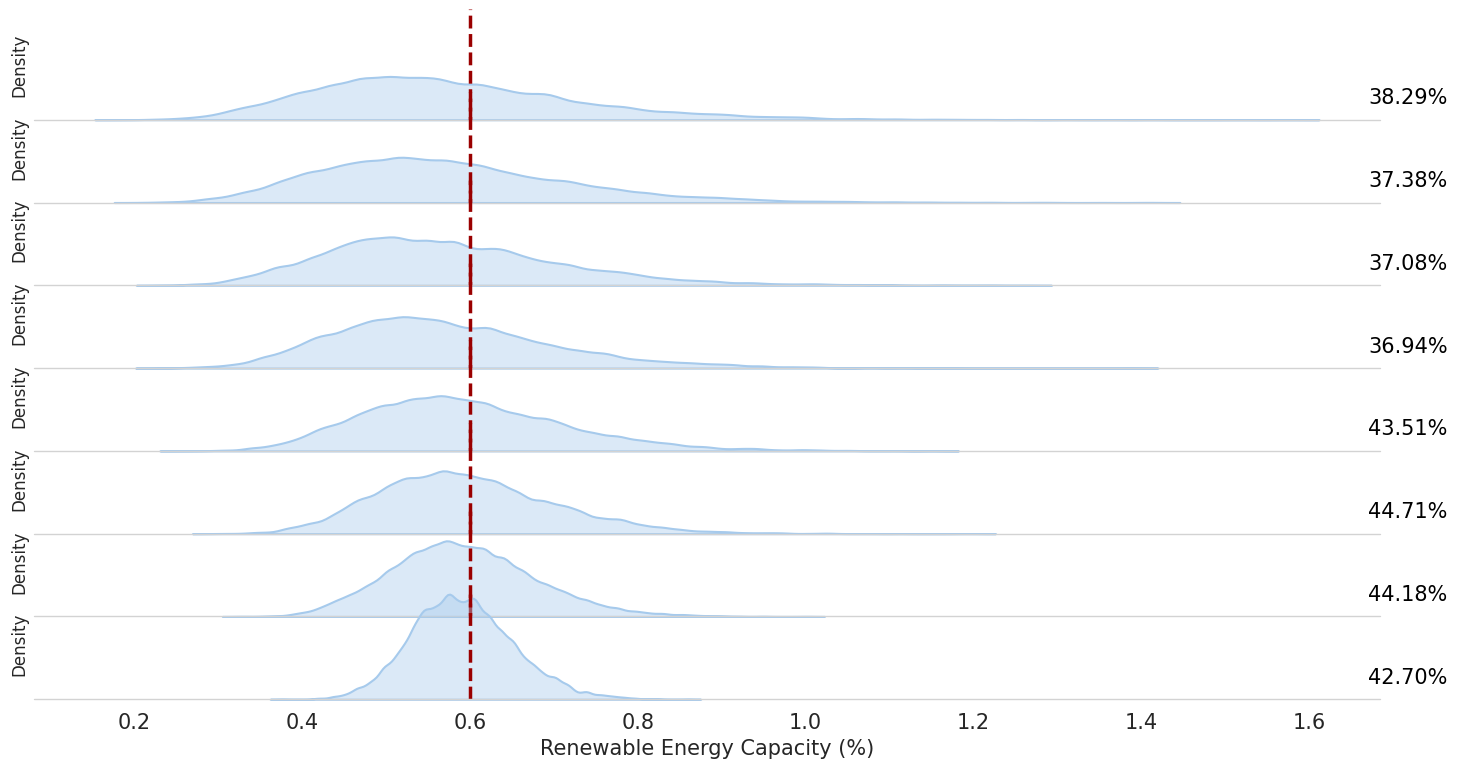

In [ ]:
######################################################################################################################################################
######################################################################################################################################################

# ENEL REC ONE

######################################################################################################################################################
######################################################################################################################################################

import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

# Constants and input data initialization
face_value = 500
coupon_rate = 0.01
coupon_payment = face_value * coupon_rate
issuance_date, maturity_date = 2020, 2027
maturity_years = 7
kpi = 'Renewable Energy'
target_renewable_energy, target_date = 0.60, "2022Q4"

# Historical quarterly renewable energy capacity data
historical_renewable_energy = np.array([0.38290744, 0.40907582,
    0.40630384, 0.41099488, 0.41267188, 0.4261573, 0.43267088,
    0.43553211, 0.43428198, 0.43505504, 0.4380508, 0.44413041,
    0.45108222, 0.4574235, 0.46074208, 0.45179673, 0.45787199,
    0.46221186, 0.45916642, 0.46199977, 0.49951985, 0.50166387,
    0.51857673, 0.52254823, 0.53611538, 0.53874128, 0.54457876,
    0.54934431, 0.57508787, 0.58040426, 0.5824372, 0.58664315,
    0.63328092, 0.6511867
])


new_quarterly_data = np.array([
    0.53611538, 0.53874128, 0.54457876, 0.54934431,
    0.57508787, 0.58040426, 0.5824372, 0.58664315
])

# Ensure reproducibility
np.random.seed(42)

# Generate date range for historical data
start_date, end_date = "2014Q4", "2020Q4"
date_range = pd.period_range(start="2014Q4", end="2020Q4", freq='Q')
historical_dates_datetime = pd.to_datetime(date_range.astype(str))
future_dates = pd.period_range(start=date_range[-1] + 1, end="2022Q4", freq='Q')
future_dates_datetime = pd.to_datetime(future_dates.astype(str))

# Calculate the number of quarters to the target
num_quarters_to_target = len(pd.period_range(start="2021Q1", end="2022Q4", freq='Q'))

##############################################################################################################################
# PROBABILITY BASELINE

current_data = historical_renewable_energy

def mean_reversion(kpi):
    log_returns = np.diff(np.log(kpi))
    returns = np.diff(kpi, n=1)
    garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='ged')
    garch_fit = garch_model.fit(disp='off')
    omega = garch_fit.params['omega']
    alpha = garch_fit.params['alpha[1]']
    beta = garch_fit.params['beta[1]']
    conditional_volatility = garch_fit.conditional_volatility
    variances = conditional_volatility**2
    xi = np.mean(variances)
    rho = np.corrcoef(log_returns[:-1], variances[1:])[0, 1]

    if alpha + beta < 1:
        theta = omega / (1 - alpha - beta)
        kappa = 1 - alpha - beta
        return theta, kappa, xi, rho
    else:
        print("Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.")
        return None, None

def monte_carlo_simulation(M, N, dt, drift, kappa, theta, xi, rho, initial_value, initial_variance):
    S = np.zeros((M, N + 1))
    V = np.zeros((M, N + 1))
    S[:, 0] = initial_value
    V[:, 0] = initial_variance
    for t in range(1, N + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * np.sqrt(dt) * z1, 0)
        S[:, t] = np.minimum(S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2), 100)
    return S


kpi = historical_renewable_energy

def recalculate_parameters(data):
    kpi = historical_renewable_energy
    log_returns = np.diff(np.log(kpi))

    drift = np.mean(log_returns)
    volatility = np.std(log_returns)
    theta, kappa, xi, rho = mean_reversion(kpi)
    return drift, volatility, theta, kappa, xi, rho

# Monte Carlo Simulation Parameters
def run_monte_carlo(S0, V0, drift, volatility, theta, kappa, xi, rho, num_quarters_to_target):
    M = 10000  # Number of simulation paths
    dt = 0.5
    S = np.zeros((M, num_quarters_to_target + 1))
    V = np.zeros((M, num_quarters_to_target + 1))
    S[:, 0] = current_data[-1]
    V[:, 0] = volatility

    for t in range(1, num_quarters_to_target + 1):
        z1 = np.random.normal(0, 1, M)
        z2 = rho * z1 + np.sqrt(1 - rho**2) * np.random.normal(0, 1, M)
        V[:, t] = np.maximum(V[:, t-1] + kappa * (theta - V[:, t-1]) * dt + xi * np.sqrt(V[:, t-1]) * np.sqrt(dt) * z1, 0)
        S[:, t] = np.minimum(S[:, t-1] * np.exp((drift - 0.5 * V[:, t-1]) * dt + np.sqrt(V[:, t-1] * dt) * z2), 100)

    return S

# Prepare a DataFrame to accumulate all simulation end values across quarters
simulation_results = pd.DataFrame()

for index, quarter_data in enumerate(new_quarterly_data):
    # Update historical data with the new quarterly data
    current_data = np.append(current_data, quarter_data)
    # Recalculate parameters based on the updated dataset
    drift, volatility, theta, kappa, xi, rho = recalculate_parameters(current_data)
    # Determine the number of quarters until the target date
    num_quarters_to_target = len(new_quarterly_data) - np.where(new_quarterly_data == quarter_data)[0][0]
    # Run updated Monte Carlo simulations
    S0 = current_data[-1]
    V0 = volatility ** 2  # Assuming volatility is the std deviation of log returns, so V0 is variance
    simulations = run_monte_carlo(S0, V0, drift, volatility, theta, kappa, xi, rho, num_quarters_to_target)
    # Estimate the probability of achieving the target
    probability_of_achieving_target = np.mean(simulations[:, -1] >= target_renewable_energy)
    print(f"Probability of achieving the target after updating with data up to and including {quarter_data}: {probability_of_achieving_target:.2%}")

    # Accumulate simulation results
    df_temp = pd.DataFrame({'Capacity': simulations[:, -1], 'Quarter': f'After Q{index + 1}'})
    simulation_results = pd.concat([simulation_results, df_temp], ignore_index=True)

#############################################################################################################################################
# Ridge Plot
# Customize the ridge plot
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create custom transparent blue color
custom_blue_transparent = (166/255, 202/255, 236/255, 0.4)  # RGBA for 40% opacity of #042433

# Initialize the FacetGrid with the transparent blue color
num_quarters = len(new_quarterly_data)
g = sns.FacetGrid(simulation_results, row="Quarter", hue="Quarter", aspect=15, height=1, palette=[custom_blue_transparent]*num_quarters)

# Map the density plot to each row with more overlap
g.map(sns.kdeplot, "Capacity", bw_adjust=0.5, clip_on=False, fill=True, alpha=0.4, linewidth=1.5)

# Manually add the vertical target line in the specified color to each plot
target_color = '#9A0000'
for ax in g.axes.flat:
    ax.axvline(x=0.60, color=target_color, linestyle='--', lw=2.5)

# Define and use a function to label each plot with the probability
def label(x, color, label):
    ax = plt.gca()
    probability = f"{np.mean(x >= 0.60):.2%}"
    ax.text(1.05, .2, probability, color='black', ha="right", va="center", transform=ax.transAxes, fontsize=15)

# Apply labels to each facet
g.map(label, "Capacity")

# Set axes options and remove y-axis and titles details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# Overlap the plots
g.fig.subplots_adjust(hspace=-0.25)

# Add light grey horizontal lines to each axis
for ax in g.axes.flat:
    ax.axhline(y=0, lw=1, clip_on=False, color='lightgrey')

# Remove the "After QX" texts
for ax in g.axes.flat:
    ax.set_title('')

# Adjust the x-axis labels and "Capacity" label font size
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=15)  # Set the size of x-axis value labels to 1.5 times the default
    ax.set_xlabel('Renewable Energy Capacity (%)', fontsize=15)  # Set the size of x-axis label to 1.5 times the default

plt.show()


# GARCH

In [ ]:
######################################################################################################################################################
######################################################################################################################################################

# GARCH: MEAN REVERSION SPEED FOR THE VARIANCE

######################################################################################################################################################
######################################################################################################################################################


def analyze_time_series(data, series_name):
    # Check which series is being analyzed and apply the appropriate transformation
    if series_name == "ENEL KPI":
        returns = np.diff(data, n=1)
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='ged')
    elif series_name == "GHG KPI":
        returns = np.diff(np.log(data)) * 10
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='skewt')
    else:
        returns = np.diff(data, n=1) * 0.1
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='skewt')

    # Fit GARCH model
    garch_fit = garch_model.fit(update_freq=5, disp='off')

   # Parameters extraction
    omega = garch_fit.params['omega']
    alpha = garch_fit.params['alpha[1]']
    beta = garch_fit.params['beta[1]']

    # Calculate mean reversion level VL
    if alpha + beta < 1:
        VL = omega / (1 - alpha - beta)
        print(f"Mean Reversion Level (VL) for {series_name}: {VL:.4f}")
    else:
        print("Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.")

    # Calculate mean reversion speed
    mean_reversion_speed = 1 - alpha - beta
    print(f"Mean Reversion Speed for the Variance of {series_name}: {mean_reversion_speed:.4f}")

    # Output the fit summary or other diagnostics
    print(f"Results for {series_name}:")
    print(garch_fit.summary())

    # Print AIC and BIC
    print(f"AIC for {series_name}: {garch_fit.aic:.4f}")
    print(f"BIC for {series_name}: {garch_fit.bic:.4f}")

    # Standardized residuals
    std_resid = garch_fit.resid / garch_fit.conditional_volatility
    squared_std_resid = std_resid**2

    # Ljung-Box test on standardized residuals
    lb_result_std_resid = acorr_ljungbox(std_resid, lags=[4], return_df=True)
    print(f"Ljung-Box Test on Standardized Residuals for {series_name}: Statistic={lb_result_std_resid['lb_stat'].iloc[0]}, p-value={lb_result_std_resid['lb_pvalue'].iloc[0]}")

    # Ljung-Box test on squared standardized residuals
    lb_result_sq_resid = acorr_ljungbox(squared_std_resid, lags=[4], return_df=True)
    print(f"Ljung-Box Test on Squared Standardized Residuals for {series_name}: Statistic={lb_result_sq_resid['lb_stat'].iloc[0]}, p-value={lb_result_sq_resid['lb_pvalue'].iloc[0]}")

    # Engle's ARCH test for autoregressive conditional heteroscedasticity
    arch_test_statistic, arch_p_value, _, _ = het_arch(std_resid)
    print(f"Engle's ARCH Test for {series_name}: Statistic={arch_test_statistic}, p-value={arch_p_value}")

    # Jarque-Bera test for normality of standardized residuals
    jb_statistic, jb_p_value = jarque_bera(std_resid)
    print(f"Jarque-Bera Test for {series_name}: Statistic={jb_statistic}, p-value={jb_p_value}")


# Time series data
kpi_ncre = np.array([9, 9, 11.1, 11.6, 12.9, 13.1, 14, 14, 16, 17, 18, 18, 18, 19, 20, 20.6, 20.9, 21.3, 21.9, 22.2, 23, 24.1,
       24.8, 25.9, 27.1, 28.1, 29.9, 31.6, 33.8])
kpi_ghg = np.array([
    48.8, 47.1, 49.1, 51.8, 54.5, 57.7, 63.3, 69.8, 70.9, 73.9, 71.5, 70.0, 71.2, 72.2, 77.7, 78.8,
    80.7, 90.0, 90.2, 86.9, 87.0, 95.6, 101.1, 100.4, 96.8, 103.0, 107.5, 108.0, 109.5, 111.0, 105.6
])
kpi_enel = np.array([0.38290744, 0.40907582,
    0.40630384, 0.41099488, 0.41267188, 0.4261573, 0.43267088,
    0.43553211, 0.43428198, 0.43505504, 0.4380508, 0.44413041,
    0.45108222, 0.4574235, 0.46074208, 0.45179673, 0.45787199,
    0.46221186, 0.45916642, 0.46199977, 0.49951985, 0.50166387,
    0.51857673, 0.52254823, 0.53611538, 0.53874128, 0.54457876,
    0.54934431, 0.57508787, 0.58040426, 0.5824372, 0.58664315,
    0.63328092, 0.6511867
])

# Analyze each time series
analyze_time_series(kpi_ncre, "NCRE KPI")
analyze_time_series(kpi_ghg, "GHG KPI")
analyze_time_series(kpi_enel, "ENEL KPI")

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004019. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Mean Reversion Level (VL) for NCRE KPI: 0.0149
Mean Reversion Speed for the Variance of NCRE KPI: 0.0131
Results for NCRE KPI:
                           Constant Mean - GARCH Model Results                           
Dep. Variable:                                 y   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:                41.6917
Distribution:      Standardized Skew Student's t   AIC:                          -71.3835
Method:                       Maximum Likelihood   BIC:                          -63.3903
                                                   No. Observations:                   28
Date:                           Tue, Aug 06 2024   Df Residuals:                       27
Time:                                   17:32:39   Df Model:                            1
                                 Mean Model                    

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# !pip install arch
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera
from joblib import Parallel, delayed
from sklearn.utils import resample

# Helper function to transform parameters back to the original scale
def transform_back(params, scale_factor):
    transformed_params = params.copy()
    transformed_params[:, 0] = params[:, 0] / (scale_factor**2)  # omega
    return transformed_params

# Bootstrapping function
def bootstrap_garch_fit(returns, garch_model_func, scale_factor, n_bootstrap=1000):
    bootstrap_params = []
    for i in range(n_bootstrap):
        resampled_data = resample(returns)
        garch_model = garch_model_func(resampled_data)
        garch_fit = garch_model.fit(disp='off')
        bootstrap_params.append(garch_fit.params.values)
    return transform_back(np.array(bootstrap_params), scale_factor)

# Monte Carlo simulation function
def monte_carlo_simulation(fit_model, garch_model_func, scale_factor, n_simulations=1000, n_obs=None):
    simulated_params = []
    if n_obs is None:
        n_obs = fit_model.model.nobs
    for i in range(n_simulations):
        params = fit_model.params
        simulated_data = fit_model.model.simulate(params, nobs=n_obs)
        returns = simulated_data['data']
        garch_model = garch_model_func(returns)
        garch_fit = garch_model.fit(disp='off')
        simulated_params.append(garch_fit.params.values)
    return transform_back(np.array(simulated_params), scale_factor)

# Analysis function using original transformations
def analyze_time_series_original(data, series_name):
    # Original transformations
    if series_name == "ENEL KPI":
        returns = np.diff(data, n=1)
        scale_factor = 1
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='ged')
    elif series_name == "GHG KPI":
        returns = np.diff(np.log(data)) * 10
        scale_factor = 10
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='skewt')
    else:
        returns = np.diff(data, n=1) * 0.1
        scale_factor = 0.1
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='skewt')

    garch_fit = garch_model.fit(update_freq=5, disp='off')
    print(f"Results for {series_name} on original scale:")
    print(garch_fit.summary())

    # Parameters extraction
    omega = garch_fit.params['omega']
    alpha = garch_fit.params['alpha[1]']
    beta = garch_fit.params['beta[1]']

    # Calculate mean reversion level VL
    if alpha + beta < 1:
        VL = omega / (1 - alpha - beta)
        print(f"Mean Reversion Level (VL) for {series_name}: {VL:.4f}")
    else:
        print("Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.")

    # Calculate mean reversion speed
    mean_reversion_speed = 1 - alpha - beta
    print(f"Mean Reversion Speed for the Variance of {series_name}: {mean_reversion_speed:.4f}")

    return garch_fit, scale_factor

# Analysis function with bootstrapping and Monte Carlo simulations
def analyze_time_series_rescaled(data, series_name, n_bootstrap=1000, n_simulations=1000):
    # Original transformations with rescaling
    if series_name == "ENEL KPI":
        returns = np.diff(data, n=1)
        scale_factor = 100
        returns_rescaled = returns * scale_factor
        garch_model_func = lambda x: arch_model(x, vol='Garch', p=1, q=1, dist='ged')
    elif series_name == "GHG KPI":
        returns = np.diff(np.log(data)) * 10
        scale_factor = 10
        returns_rescaled = returns * scale_factor
        garch_model_func = lambda x: arch_model(x, vol='Garch', p=1, q=1, dist='skewt')
    else:
        returns = np.diff(data, n=1) * 0.1
        scale_factor = 100
        returns_rescaled = returns * scale_factor
        garch_model_func = lambda x: arch_model(x, vol='Garch', p=1, q=1, dist='skewt')

    garch_model = garch_model_func(returns_rescaled)
    try:
        garch_fit_initial = garch_model.fit(update_freq=5, disp='off', options={'maxiter': 2000})
        initial_params = garch_fit_initial.params.values
        garch_fit = garch_model.fit(update_freq=5, disp='off', options={'maxiter': 2000}, starting_values=initial_params)
    except Exception as e:
        print(f"Error fitting GARCH model for {series_name}: {e}")
        return

    omega = garch_fit.params['omega']
    alpha = garch_fit.params['alpha[1]']
    beta = garch_fit.params['beta[1]']

    if alpha + beta < 1:
        VL = omega / (1 - alpha - beta)
        print(f"Mean Reversion Level (VL) for {series_name}: {VL:.4f}")
    else:
        print(f"Model parameters for {series_name} do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.")
    mean_reversion_speed = 1 - alpha - beta
    print(f"Mean Reversion Speed for the Variance of {series_name}: {mean_reversion_speed:.4f}")

    print(f"Results for {series_name}:")
    print(garch_fit.summary())
    print(f"AIC for {series_name}: {garch_fit.aic:.4f}")
    print(f"BIC for {series_name}: {garch_fit.bic:.4f}")

    std_resid = garch_fit.resid / garch_fit.conditional_volatility
    squared_std_resid = std_resid**2
    lb_result_std_resid = acorr_ljungbox(std_resid, lags=[4], return_df=True)
    print(f"Ljung-Box Test on Standardized Residuals for {series_name}: Statistic={lb_result_std_resid['lb_stat'].iloc[0]}, p-value={lb_result_std_resid['lb_pvalue'].iloc[0]}")
    lb_result_sq_resid = acorr_ljungbox(squared_std_resid, lags=[4], return_df=True)
    print(f"Ljung-Box Test on Squared Standardized Residuals for {series_name}: Statistic={lb_result_sq_resid['lb_stat'].iloc[0]}, p-value={lb_result_sq_resid['lb_pvalue'].iloc[0]}")
    arch_test_statistic, arch_p_value, _, _ = het_arch(std_resid)
    print(f"Engle's ARCH Test for {series_name}: Statistic={arch_test_statistic}, p-value={arch_p_value}")
    jb_statistic, jb_p_value = jarque_bera(std_resid)
    print(f"Jarque-Bera Test for {series_name}: Statistic={jb_statistic}, p-value={jb_p_value}")

    # Perform bootstrapping
    bootstrap_params = bootstrap_garch_fit(returns_rescaled, garch_model_func, scale_factor, n_bootstrap)
    print(f"Bootstrap parameter estimates for {series_name} (transformed back):")
    print(f"Omega: mean={np.mean(bootstrap_params[:, 0]):.4f}, std={np.std(bootstrap_params[:, 0]):.4f}")
    print(f"Alpha: mean={np.mean(bootstrap_params[:, 1]):.4f}, std={np.std(bootstrap_params[:, 1]):.4f}")
    print(f"Beta: mean={np.mean(bootstrap_params[:, 2]):.4f}, std={np.std(bootstrap_params[:, 2]):.4f}")

    # Perform Monte Carlo simulation
    monte_carlo_params = monte_carlo_simulation(garch_fit, garch_model_func, scale_factor, n_simulations, len(returns))
    print(f"Monte Carlo simulation parameter estimates for {series_name} (transformed back):")
    print(f"Omega: mean={np.mean(monte_carlo_params[:, 0]):.4f}, std={np.std(monte_carlo_params[:, 0]):.4f}")
    print(f"Alpha: mean={np.mean(monte_carlo_params[:, 1]):.4f}, std={np.std(monte_carlo_params[:, 1]):.4f}")
    print(f"Beta: mean={np.mean(monte_carlo_params[:, 2]):.4f}, std={np.std(monte_carlo_params[:, 2]):.4f}")

# Time series data
kpi_ncre = np.array([9, 9, 11.1, 11.6, 12.9, 13.1, 14, 14, 16, 17, 18, 18, 18, 19, 20, 20.6, 20.9, 21.3, 21.9, 22.2, 23, 24.1,
       24.8, 25.9, 27.1, 28.1, 29.9, 31.6, 33.8])
kpi_ghg = np.array([
    48.8, 47.1, 49.1, 51.8, 54.5, 57.7, 63.3, 69.8, 70.9, 73.9, 71.5, 70.0, 71.2, 72.2, 77.7, 78.8,
    80.7, 90.0, 90.2, 86.9, 87.0, 95.6, 101.1, 100.4, 96.8, 103.0, 107.5, 108.0, 109.5, 111.0, 105.6
])
kpi_enel = np.array([0.38290744, 0.40907582,
    0.40630384, 0.41099488, 0.41267188, 0.4261573, 0.43267088,
    0.43553211, 0.43428198, 0.43505504, 0.4380508, 0.44413041,
    0.45108222, 0.4574235, 0.46074208, 0.45179673, 0.45787199,
    0.46221186, 0.45916642, 0.46199977, 0.49951985, 0.50166387,
    0.51857673, 0.52254823, 0.53611538, 0.53874128, 0.54457876,
    0.54934431, 0.57508787, 0.58040426, 0.5824372, 0.58664315,
    0.63328092, 0.6511867
])

# Analyze time series data on original scale
analyze_time_series_original(kpi_enel, "ENEL KPI")
analyze_time_series_original(kpi_ghg, "GHG KPI")
analyze_time_series_original(kpi_ncre, "NCRE KPI")

# Analyze time series data with rescaling
analyze_time_series_rescaled(kpi_enel, "ENEL KPI")
analyze_time_series_rescaled(kpi_ghg, "GHG KPI")
analyze_time_series_rescaled(kpi_ncre, "NCRE KPI")

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Results for ENEL KPI on original scale:
                           Constant Mean - GARCH Model Results                            
Dep. Variable:                                  y   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                  GARCH   Log-Likelihood:                103.907
Distribution:      Generalized Error Distribution   AIC:                          -197.813
Method:                        Maximum Likelihood   BIC:                          -190.331
                                                    No. Observations:                   33
Date:                            Tue, Aug 06 2024   Df Residuals:                       32
Time:                                    18:36:48   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004019. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Results for NCRE KPI on original scale:
                           Constant Mean - GARCH Model Results                           
Dep. Variable:                                 y   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:                41.6917
Distribution:      Standardized Skew Student's t   AIC:                          -71.3835
Method:                       Maximum Likelihood   BIC:                          -63.3903
                                                   No. Observations:                   28
Date:                           Tue, Aug 06 2024   Df Residuals:                       27
Time:                                   18:36:48   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. I

/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:1194: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:1194: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:1194: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu


Bootstrap parameter estimates for ENEL KPI (transformed back):
Omega: mean=0.0000, std=0.0000
Alpha: mean=0.4282, std=0.4473
Beta: mean=0.0762, std=0.1798
Monte Carlo simulation parameter estimates for ENEL KPI (transformed back):
Omega: mean=0.0000, std=0.0000
Alpha: mean=0.2692, std=0.3259
Beta: mean=0.0905, std=0.2027
Mean Reversion Level (VL) for GHG KPI: 18.3549
Mean Reversion Speed for the Variance of GHG KPI: 0.7210
Results for GHG KPI:
                           Constant Mean - GARCH Model Results                           
Dep. Variable:                                 y   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -86.2125
Distribution:      Standardized Skew Student's t   AIC:                           184.425
Method:                       Maximum Likelihood   BIC:                           192.832
            

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: Con

Bootstrap parameter estimates for GHG KPI (transformed back):
Omega: mean=3017456.8378, std=95370648.6632
Alpha: mean=6.3546, std=7.8372
Beta: mean=0.0749, std=0.1718


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The opt

Monte Carlo simulation parameter estimates for GHG KPI (transformed back):
Omega: mean=0.0257, std=0.0104
Alpha: mean=6.7203, std=12.6228
Beta: mean=0.0851, std=0.1966
Mean Reversion Level (VL) for NCRE KPI: 54.9702
Mean Reversion Speed for the Variance of NCRE KPI: 0.2152
Results for NCRE KPI:
                           Constant Mean - GARCH Model Results                           
Dep. Variable:                                 y   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -87.9574
Distribution:      Standardized Skew Student's t   AIC:                           187.915
Method:                       Maximum Likelihood   BIC:                           195.908
                                                   No. Observations:                   28
Date:                           Tue, Aug 06 2024   Df Residuals:          

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base

Bootstrap parameter estimates for NCRE KPI (transformed back):
Omega: mean=-0.6718, std=21.2614
Alpha: mean=14.4071, std=23.0746
Beta: mean=0.0692, std=0.1955


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: Con

Monte Carlo simulation parameter estimates for NCRE KPI (transformed back):
Omega: mean=26125.4075, std=825744.7122
Alpha: mean=16.5109, std=26.8081
Beta: mean=0.1969, std=0.2274


In [ ]:

def calculate_vl_and_speed(alpha, beta, omega, vl_cap=1000):
    if alpha + beta < 1:
        VL = omega / (1 - alpha - beta)
        if VL > vl_cap:
            VL = vl_cap
            print(f"VL capped at {vl_cap}")
        mean_reversion_speed = 1 - alpha + beta
        return VL, mean_reversion_speed
    else:
        print("Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.")
        return None, None

def bootstrap_garch_fit(returns, garch_model_func, n_bootstrap=1000):
    bootstrap_params = []
    for i in range(n_bootstrap):
        resampled_data = resample(returns)
        garch_model = garch_model_func(resampled_data)
        garch_fit = garch_model.fit(disp='off')
        bootstrap_params.append(garch_fit.params)
    return np.array(bootstrap_params)

def monte_carlo_simulation(fit_model, garch_model_func, n_simulations=1000, n_obs=None):
    simulated_params = []
    if n_obs is None:
        n_obs = fit_model.model.nobs
    for i in range(n_simulations):
        params = fit_model.params
        simulated_data = fit_model.model.simulate(params, nobs=n_obs)
        returns = simulated_data['data']
        garch_model = garch_model_func(returns)
        garch_fit = garch_model.fit(disp='off')
        simulated_params.append(garch_fit.params)
    return np.array(simulated_params)

def transform_back(params, scale_factor):
    transformed_params = params.copy()
    transformed_params[:, 0] = params[:, 0] / scale_factor**2  # omega
    transformed_params[:, 1] = params[:, 1]  # alpha (unchanged)
    transformed_params[:, 2] = params[:, 2]  # beta (unchanged)
    return transformed_params

def analyze_time_series_original(data, series_name):
    if series_name == "ENEL KPI":
        returns = np.diff(data, n=1)
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='ged')
    elif series_name == "GHG KPI":
        returns = np.diff(np.log(data)) * 10
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='skewt')
    else:
        returns = np.diff(data, n=1) * 0.1
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='skewt')

    garch_fit = garch_model.fit(update_freq=5, disp='off')
    print(f"Results for {series_name} on original scale:")
    print(garch_fit.summary())
    return garch_fit

def analyze_time_series_rescaled(data, series_name, n_bootstrap=1000, n_simulations=1000, vl_cap=1000):
    if series_name == "ENEL KPI":
        returns = np.diff(data, n=1)
        scale_factor = 100
        returns = returns * scale_factor
        garch_model_func = lambda x: arch_model(x, vol='Garch', p=1, q=1, dist='ged')
    elif series_name == "GHG KPI":
        returns = np.diff(np.log(data)) * 10
        scale_factor = 100
        returns = returns * scale_factor
        garch_model_func = lambda x: arch_model(x, vol='Garch', p=1, q=1, dist='skewt')
    else:
        returns = np.diff(data, n=1) * 0.1
        scale_factor = 10
        returns = returns * scale_factor
        garch_model_func = lambda x: arch_model(x, vol='Garch', p=1, q=1, dist='skewt')

    garch_model = garch_model_func(returns)
    try:
        garch_fit_initial = garch_model.fit(update_freq=5, disp='off', options={'maxiter': 2000})
        initial_params = garch_fit_initial.params.values
        garch_fit = garch_model.fit(update_freq=5, disp='off', options={'maxiter': 2000}, starting_values=initial_params)
    except Exception as e:
        print(f"Error fitting GARCH model for {series_name}: {e}")
        return

    omega = garch_fit.params['omega']
    alpha = garch_fit.params['alpha[1]']
    beta = garch_fit.params['beta[1]']

    VL, mean_reversion_speed = calculate_vl_and_speed(alpha, beta, omega, vl_cap)
    print(f"Mean Reversion Level (VL) for {series_name}: {VL}")
    print(f"Mean Reversion Speed for the Variance of {series_name}: {mean_reversion_speed:.4f}")

    print(f"Results for {series_name}:")
    print(garch_fit.summary())
    print(f"AIC for {series_name}: {garch_fit.aic:.4f}")
    print(f"BIC for {series_name}: {garch_fit.bic:.4f}")

    std_resid = garch_fit.resid / garch_fit.conditional_volatility
    squared_std_resid = std_resid**2
    lb_result_std_resid = acorr_ljungbox(std_resid, lags=[4], return_df=True)
    print(f"Ljung-Box Test on Standardized Residuals for {series_name}: Statistic={lb_result_std_resid['lb_stat'].iloc[0]}, p-value={lb_result_std_resid['lb_pvalue'].iloc[0]}")
    lb_result_sq_resid = acorr_ljungbox(squared_std_resid, lags=[4], return_df=True)
    print(f"Ljung-Box Test on Squared Standardized Residuals for {series_name}: Statistic={lb_result_sq_resid['lb_stat'].iloc[0]}, p-value={lb_result_sq_resid['lb_pvalue'].iloc[0]}")
    arch_test_statistic, arch_p_value, _, _ = het_arch(std_resid)
    print(f"Engle's ARCH Test for {series_name}: Statistic={arch_test_statistic}, p-value={arch_p_value}")
    jb_statistic, jb_p_value = jarque_bera(std_resid)
    print(f"Jarque-Bera Test for {series_name}: Statistic={jb_statistic}, p-value={jb_p_value}")

    bootstrap_params = bootstrap_garch_fit(returns, garch_model_func, n_bootstrap)
    transformed_bootstrap_params = transform_back(bootstrap_params, scale_factor)
    print(f"Bootstrap parameter estimates for {series_name} (transformed back):")
    VL_bootstrap = []
    speed_bootstrap = []
    for params in transformed_bootstrap_params:
        omega, alpha, beta = params[0], params[1], params[2]
        VL, speed = calculate_vl_and_speed(alpha, beta, omega, vl_cap)
        if VL is not None and speed is not None:
            VL_bootstrap.append(VL)
            speed_bootstrap.append(speed)
    print(f"Mean Reversion Level (VL): mean={np.mean(VL_bootstrap):.4f}, std={np.std(VL_bootstrap):.4f}")
    print(f"Mean Reversion Speed: mean={np.mean(speed_bootstrap):.4f}, std={np.std(speed_bootstrap):.4f}")

    monte_carlo_params = monte_carlo_simulation(garch_fit, garch_model_func, n_simulations, len(returns))
    transformed_monte_carlo_params = transform_back(monte_carlo_params, scale_factor)
    print(f"Monte Carlo simulation parameter estimates for {series_name} (transformed back):")
    VL_monte_carlo = []
    speed_monte_carlo = []
    for params in transformed_monte_carlo_params:
        omega, alpha, beta = params[0], params[1], params[2]
        VL, speed = calculate_vl_and_speed(alpha, beta, omega, vl_cap)
        if VL is not None and speed is not None:
            VL_monte_carlo.append(VL)
            speed_monte_carlo.append(speed)
    print(f"Mean Reversion Level (VL): mean={np.mean(VL_monte_carlo):.4f}, std={np.std(VL_monte_carlo):.4f}")
    print(f"Mean Reversion Speed: mean={np.mean(speed_monte_carlo):.4f}, std={np.std(speed_monte_carlo):.4f}")

# Time series data
kpi_ncre = np.array([9, 9, 11.1, 11.6, 12.9, 13.1, 14, 14, 16, 17, 18, 18, 18, 19, 20, 20.6, 20.9, 21.3, 21.9, 22.2, 23, 24.1,
       24.8, 25.9, 27.1, 28.1, 29.9, 31.6, 33.8])
kpi_ghg = np.array([
    48.8, 47.1, 49.1, 51.8, 54.5, 57.7, 63.3, 69.8, 70.9, 73.9, 71.5, 70.0, 71.2, 72.2, 77.7, 78.8,
    80.7, 90.0, 90.2, 86.9, 87.0, 95.6, 101.1, 100.4, 96.8, 103.0, 107.5, 108.0, 109.5, 111.0, 105.6
])
kpi_enel = np.array([0.38290744, 0.40907582,
    0.40630384, 0.41099488, 0.41267188, 0.4261573, 0.43267088,
    0.43553211, 0.43428198, 0.43505504, 0.4380508, 0.44413041,
    0.45108222, 0.4574235, 0.46074208, 0.45179673, 0.45787199,
    0.46221186, 0.45916642, 0.46199977, 0.49951985, 0.50166387,
    0.51857673, 0.52254823, 0.53611538, 0.53874128, 0.54457876,
    0.54934431, 0.57508787, 0.58040426, 0.5824372, 0.58664315,
    0.63328092, 0.6511867
])


# Analyze time series data
analyze_time_series_original(kpi_enel, "ENEL KPI")
analyze_time_series_original(kpi_ghg, "GHG KPI")
analyze_time_series_original(kpi_ncre, "NCRE KPI")

analyze_time_series_rescaled(kpi_enel, "ENEL KPI")
analyze_time_series_rescaled(kpi_ghg, "GHG KPI")
analyze_time_series_rescaled(kpi_ncre, "NCRE KPI")


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Results for ENEL KPI on original scale:
                           Constant Mean - GARCH Model Results                            
Dep. Variable:                                  y   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                  GARCH   Log-Likelihood:                103.907
Distribution:      Generalized Error Distribution   AIC:                          -197.813
Method:                        Maximum Likelihood   BIC:                          -190.331
                                                    No. Observations:                   33
Date:                            Tue, Aug 06 2024   Df Residuals:                       32
Time:                                    19:11:13   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004019. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Results for NCRE KPI on original scale:
                           Constant Mean - GARCH Model Results                           
Dep. Variable:                                 y   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:                41.6917
Distribution:      Standardized Skew Student's t   AIC:                          -71.3835
Method:                       Maximum Likelihood   BIC:                          -63.3903
                                                   No. Observations:                   28
Date:                           Tue, Aug 06 2024   Df Residuals:                       27
Time:                                   19:11:15   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. I

/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:1194: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu


Bootstrap parameter estimates for ENEL KPI (transformed back):
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alph

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarn

Bootstrap parameter estimates for GHG KPI (transformed back):
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: Con

Monte Carlo simulation parameter estimates for GHG KPI (transformed back):
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level;

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: Con

Bootstrap parameter estimates for NCRE KPI (transformed back):
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alph

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.686e-07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnin

Monte Carlo simulation parameter estimates for NCRE KPI (transformed back):
VL capped at 1000
VL capped at 1000
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
VL capped at 1000
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
VL capped at 1000
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
VL capped at 1000
VL capped at 1000
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
VL capped at 1000
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion level; adjust alpha and beta to ensure their sum is less than 1.
Model parameters do not allow for a stable mean reversion le

In [ ]:

# Helper Function for Calculating VL and Speed
def calculate_vl_and_speed(alpha, beta, omega, vl_cap=1):
    if alpha + beta < 1:
        VL = omega / (1 - alpha - beta)
        if VL > vl_cap:
            VL = vl_cap
        if VL < 0:
            VL = 0
        mean_reversion_speed = 1 - alpha - beta
        if mean_reversion_speed > 1:
            mean_reversion_speed = 1
        if mean_reversion_speed < 0:
            mean_reversion_speed = 0
        return VL, mean_reversion_speed
    else:
        return None, None

# Bootstrap Function
def bootstrap_garch_fit(returns, garch_model_func, n_bootstrap=1000):
    bootstrap_params = []
    for i in range(n_bootstrap):
        resampled_data = resample(returns)
        garch_model = garch_model_func(resampled_data)
        garch_fit = garch_model.fit(disp='off')
        bootstrap_params.append(garch_fit.params)
    return np.array(bootstrap_params)

# Transform Back Function
def transform_back(params, scale_factor):
    transformed_params = params.copy()
    transformed_params[:, 0] = params[:, 0] / scale_factor**2  # omega
    transformed_params[:, 1] = params[:, 1]  # alpha (unchanged)
    transformed_params[:, 2] = params[:, 2]  # beta (unchanged)
    return transformed_params

# Analyze Time Series Function
def analyze_time_series_original(data, series_name):
    if series_name == "ENEL KPI":
        returns = np.diff(data, n=1)
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='ged')
    elif series_name == "GHG KPI":
        returns = np.diff(np.log(data)) * 10
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='skewt')
    else:
        returns = np.diff(data, n=1) * 0.1
        garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='skewt')

    garch_fit = garch_model.fit(update_freq=5, disp='off')
    print(f"Results for {series_name} on original scale:")
    print(garch_fit.summary())
    return garch_fit

def analyze_time_series_rescaled(data, series_name, n_bootstrap=1000, vl_cap=1):
    if series_name == "ENEL KPI":
        returns = np.diff(data, n=1)
        scale_factor = 100
        returns = returns * scale_factor
        garch_model_func = lambda x: arch_model(x, vol='Garch', p=1, q=1, dist='ged')
    elif series_name == "GHG KPI":
        returns = np.diff(np.log(data)) * 10
        scale_factor = 100
        returns = returns * scale_factor
        garch_model_func = lambda x: arch_model(x, vol='Garch', p=1, q=1, dist='skewt')
    else:
        returns = np.diff(data, n=1) * 0.1
        scale_factor = 10
        returns = returns * scale_factor
        garch_model_func = lambda x: arch_model(x, vol='Garch', p=1, q=1, dist='skewt')

    garch_model = garch_model_func(returns)
    try:
        garch_fit_initial = garch_model.fit(update_freq=5, disp='off', options={'maxiter': 2000})
        initial_params = garch_fit_initial.params.values
        garch_fit = garch_model.fit(update_freq=5, disp='off', options={'maxiter': 2000}, starting_values=initial_params)
    except Exception as e:
        print(f"Error fitting GARCH model for {series_name}: {e}")
        return

    omega = garch_fit.params['omega']
    alpha = garch_fit.params['alpha[1]']
    beta = garch_fit.params['beta[1]']

    VL, mean_reversion_speed = calculate_vl_and_speed(alpha, beta, omega, vl_cap)
    print(f"Mean Reversion Level (VL) for {series_name}: {VL}")
    print(f"Mean Reversion Speed for the Variance of {series_name}: {mean_reversion_speed:.4f}")

    print(f"Results for {series_name}:")
    print(garch_fit.summary())
    print(f"AIC for {series_name}: {garch_fit.aic:.4f}")
    print(f"BIC for {series_name}: {garch_fit.bic:.4f}")

    std_resid = garch_fit.resid / garch_fit.conditional_volatility
    squared_std_resid = std_resid**2
    lb_result_std_resid = acorr_ljungbox(std_resid, lags=[4], return_df=True)
    print(f"Ljung-Box Test on Standardized Residuals for {series_name}: Statistic={lb_result_std_resid['lb_stat'].iloc[0]}, p-value={lb_result_std_resid['lb_pvalue'].iloc[0]}")
    lb_result_sq_resid = acorr_ljungbox(squared_std_resid, lags=[4], return_df=True)
    print(f"Ljung-Box Test on Squared Standardized Residuals for {series_name}: Statistic={lb_result_sq_resid['lb_stat'].iloc[0]}, p-value={lb_result_sq_resid['lb_pvalue'].iloc[0]}")
    arch_test_statistic, arch_p_value, _, _ = het_arch(std_resid)
    print(f"Engle's ARCH Test for {series_name}: Statistic={arch_test_statistic}, p-value={arch_p_value}")
    jb_statistic, jb_p_value = jarque_bera(std_resid)
    print(f"Jarque-Bera Test for {series_name}: Statistic={jb_statistic}, p-value={jb_p_value}")

    bootstrap_params = bootstrap_garch_fit(returns, garch_model_func, n_bootstrap)
    transformed_bootstrap_params = transform_back(bootstrap_params, scale_factor)
    print(f"Bootstrap parameter estimates for {series_name} (transformed back):")
    VL_bootstrap = []
    speed_bootstrap = []
    for params in transformed_bootstrap_params:
        omega, alpha, beta = params[0], params[1], params[2]
        VL, speed = calculate_vl_and_speed(alpha, beta, omega, vl_cap)
        if VL is not None and speed is not None:
            VL_bootstrap.append(VL)
            speed_bootstrap.append(speed)
    print(f"Mean Reversion Level (VL): mean={np.mean(VL_bootstrap):.4f}, std={np.std(VL_bootstrap):.4f}")
    print(f"Mean Reversion Speed: mean={np.mean(speed_bootstrap):.4f}, std={np.std(speed_bootstrap):.4f}")


# Time series data
kpi_ncre = np.array([9, 9, 11.1, 11.6, 12.9, 13.1, 14, 14, 16, 17, 18, 18, 18, 19, 20, 20.6, 20.9, 21.3, 21.9, 22.2, 23, 24.1,
       24.8, 25.9, 27.1, 28.1, 29.9, 31.6, 33.8])
kpi_ghg = np.array([
    48.8, 47.1, 49.1, 51.8, 54.5, 57.7, 63.3, 69.8, 70.9, 73.9, 71.5, 70.0, 71.2, 72.2, 77.7, 78.8,
    80.7, 90.0, 90.2, 86.9, 87.0, 95.6, 101.1, 100.4, 96.8, 103.0, 107.5, 108.0, 109.5, 111.0, 105.6
])
kpi_enel = np.array([0.38290744, 0.40907582,
    0.40630384, 0.41099488, 0.41267188, 0.4261573, 0.43267088,
    0.43553211, 0.43428198, 0.43505504, 0.4380508, 0.44413041,
    0.45108222, 0.4574235, 0.46074208, 0.45179673, 0.45787199,
    0.46221186, 0.45916642, 0.46199977, 0.49951985, 0.50166387,
    0.51857673, 0.52254823, 0.53611538, 0.53874128, 0.54457876,
    0.54934431, 0.57508787, 0.58040426, 0.5824372, 0.58664315,
    0.63328092, 0.6511867
])
# Analyze time series data
analyze_time_series_original(kpi_enel, "ENEL KPI")
analyze_time_series_original(kpi_ghg, "GHG KPI")
analyze_time_series_original(kpi_ncre, "NCRE KPI")

analyze_time_series_rescaled(kpi_enel, "ENEL KPI")
analyze_time_series_rescaled(kpi_ghg, "GHG KPI")
analyze_time_series_rescaled(kpi_ncre, "NCRE KPI")


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Results for ENEL KPI on original scale:
                           Constant Mean - GARCH Model Results                            
Dep. Variable:                                  y   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                  GARCH   Log-Likelihood:                103.907
Distribution:      Generalized Error Distribution   AIC:                          -197.813
Method:                        Maximum Likelihood   BIC:                          -190.331
                                                    No. Observations:                   33
Date:                            Tue, Aug 06 2024   Df Residuals:                       32
Time:                                    20:05:58   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004019. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Results for NCRE KPI on original scale:
                           Constant Mean - GARCH Model Results                           
Dep. Variable:                                 y   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:                41.6917
Distribution:      Standardized Skew Student's t   AIC:                          -71.3835
Method:                       Maximum Likelihood   BIC:                          -63.3903
                                                   No. Observations:                   28
Date:                           Tue, Aug 06 2024   Df Residuals:                       27
Time:                                   20:05:59   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. I

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base

Bootstrap parameter estimates for GHG KPI (transformed back):
Mean Reversion Level (VL): mean=0.0026, std=0.0005
Mean Reversion Speed: mean=0.9632, std=0.0880
Mean Reversion Level (VL) for NCRE KPI: 1.225924506677994e-05
Mean Reversion Speed for the Variance of NCRE KPI: 0.0065
Results for NCRE KPI:
                           Constant Mean - GARCH Model Results                           
Dep. Variable:                                 y   R-squared:                       0.000
Mean Model:                        Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 GARCH   Log-Likelihood:               -22.8637
Distribution:      Standardized Skew Student's t   AIC:                           57.7274
Method:                       Maximum Likelihood   BIC:                           65.7206
                                                   No. Observations:                   28
Date:                           Tue, Aug 06 2024   Df Residuals:     

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The opt

Bootstrap parameter estimates for NCRE KPI (transformed back):
Mean Reversion Level (VL): mean=0.0160, std=0.0361
Mean Reversion Speed: mean=0.7349, std=0.2236


# GBM TEST

In [ ]:
######################################################################################################################################################
######################################################################################################################################################

# GBM TESTS

######################################################################################################################################################
######################################################################################################################################################


# Import necessary libraries
import numpy as np
import pandas as pd
from arch import arch_model
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from scipy.stats import levene, median_test
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_white

kpi_ncre = np.array([9, 9, 11.1, 11.6, 12.9, 13.1, 14, 14, 16, 17, 18, 18, 18, 19, 20, 20.6, 20.9, 21.3, 21.9, 22.2, 23, 24.1,
       24.8, 25.9, 27.1, 28.1, 29.9, 31.6, 33.8])
kpi_ghg = np.array([
    48.8, 47.1, 49.1, 51.8, 54.5, 57.7, 63.3, 69.8, 70.9, 73.9, 71.5, 70.0, 71.2, 72.2, 77.7, 78.8,
    80.7, 90.0, 90.2, 86.9, 87.0, 95.6, 101.1, 100.4, 96.8, 103.0, 107.5, 108.0, 109.5, 111.0, 105.6
])
kpi_enel = np.array([0.38290744, 0.40907582,
    0.40630384, 0.41099488, 0.41267188, 0.4261573, 0.43267088,
    0.43553211, 0.43428198, 0.43505504, 0.4380508, 0.44413041,
    0.45108222, 0.4574235, 0.46074208, 0.45179673, 0.45787199,
    0.46221186, 0.45916642, 0.46199977, 0.49951985, 0.50166387,
    0.51857673, 0.52254823, 0.53611538, 0.53874128, 0.54457876,
    0.54934431, 0.57508787, 0.58040426, 0.5824372, 0.58664315,
    0.63328092, 0.6511867
])

# Calculating logarithmic returns for each series
log_returns_enel = np.diff(kpi_ncre, n=1)
log_returns_ncre = np.diff(kpi_ncre, n=1)
log_returns_ghg = np.diff(np.log(kpi_ghg))

# Applying Augmented Dickey-Fuller Test to the logarithmic returns (with a trend)
adf_log_returns_enel_trend = sm.tsa.adfuller(log_returns_enel, regression='ct', autolag='AIC')
adf_log_returns_ncre_trend = sm.tsa.adfuller(log_returns_ncre, regression='ct', autolag='AIC')
adf_log_returns_ghg_trend = sm.tsa.adfuller(log_returns_ghg, regression='ct', autolag='AIC')

print("ADF Test Results with Trend:")
print(f"Enel REC: {adf_log_returns_enel_trend}")
print(f"Chile NCRE: {adf_log_returns_ncre_trend}")
print(f"Chile GHG: {adf_log_returns_ghg_trend}")

# Applying Augmented Dickey-Fuller Test to the logarithmic returns (with a trend)
adf_log_returns_enel = sm.tsa.adfuller(log_returns_enel, regression='c', autolag='AIC')
adf_log_returns_ncre = sm.tsa.adfuller(log_returns_ncre, regression='c', autolag='AIC')
adf_log_returns_ghg = sm.tsa.adfuller(log_returns_ghg, regression='c', autolag='AIC')

print("ADF Test Results without Trend:")
print(f"Enel REC: {adf_log_returns_enel}")
print(f"Chile NCRE: {adf_log_returns_ncre}")
print(f"Chile GHG: {adf_log_returns_ghg}")



# Define a function to apply Engle's ARCH test
def run_arch_test(log_returns):
    # Fit the ARCH model (default is an ARCH(1))
    model = arch_model(log_returns, mean='Zero', vol='ARCH', p=1)
    model_fit = model.fit(disp='off')
    return model_fit.summary()

# Running Engle's ARCH test for each time series
arch_results_enel = run_arch_test(log_returns_enel)
arch_results_ncre = run_arch_test(log_returns_ncre)
arch_results_ghg = run_arch_test(log_returns_ghg)

print("ARCH Test Results for KPI_ENEL Logarithmic Returns:")
print(arch_results_enel)
print("\nARCH Test Results for KPI_NCRE Logarithmic Returns:")
print(arch_results_ncre)
print("\nARCH Test Results for KPI_GHG Logarithmic Returns:")
print(arch_results_ghg)

# Example division: first half and second half of the data
half_point_enel = len(log_returns_enel) // 2
half_point_ncre = len(log_returns_ncre) // 2
half_point_ghg = len(log_returns_ghg) // 2

group1_enel = log_returns_enel[:half_point_enel]
group2_enel = log_returns_enel[half_point_enel:]

group1_ncre = log_returns_ncre[:half_point_ncre]
group2_ncre = log_returns_ncre[half_point_ncre:]

group1_ghg = log_returns_ghg[:half_point_ghg]
group2_ghg = log_returns_ghg[half_point_ghg:]

# Performing Levene’s Test for equal variances
levene_result_enel = levene(group1_enel, group2_enel, center='mean')  # 'median' can also be used
levene_result_ncre = levene(group1_ncre, group2_ncre, center='mean')
levene_result_ghg = levene(group1_ghg, group2_ghg, center='mean')

# Performing Brown-Forsythe Test for equal variances
brownforsythe_result_enel = median_test(group1_enel, group2_enel)[0:2]  # This simplifies output to statistic and p-value
brownforsythe_result_ncre = median_test(group1_ncre, group2_ncre)[0:2]
brownforsythe_result_ghg = median_test(group1_ghg, group2_ghg)[0:2]

# Print results
print("Levene's Test Results:")
print("KPI_ENEL:", levene_result_enel)
print("KPI_NCRE:", levene_result_ncre)
print("KPI_GHG:", levene_result_ghg)

print("\nBrown-Forsythe Test Results:")
print("KPI_ENEL:", brownforsythe_result_enel)
print("KPI_NCRE:", brownforsythe_result_ncre)
print("KPI_GHG:", brownforsythe_result_ghg)

# Function to estimate parameters of the Brownian Motion model
def estimate_parameters(log_returns):
    mu = np.mean(log_returns)  # Estimate of the drift
    sigma = np.std(log_returns)  # Estimate of the volatility
    return mu, sigma

# Estimating parameters for each series
mu_enel, sigma_enel = estimate_parameters(log_returns_enel)
mu_ncre, sigma_ncre = estimate_parameters(log_returns_ncre)
mu_ghg, sigma_ghg = estimate_parameters(log_returns_ghg)

print("Estimated Parameters for KPI_ENEL: Drift (mu) =", mu_enel, ", Volatility (sigma) =", sigma_enel)
print("Estimated Parameters for KPI_NCRE: Drift (mu) =", mu_ncre, ", Volatility (sigma) =", sigma_ncre)
print("Estimated Parameters for KPI_GHG: Drift (mu) =", mu_ghg, ", Volatility (sigma) =", sigma_ghg)

# Assuming you have your three time series data in the variables `kpi_enel`, `kpi_ncre`, and `kpi_ghg`
# Define a function to process each time series
def process_time_series(data):

    # Step 3: Fit a Simple Brownian Motion Model using Ordinary Least Squares
    X = sm.add_constant(np.arange(len(data)).reshape(-1, 1))  # Including a constant for the intercept
    y = data.reshape(-1, 1)
    model = sm.OLS(y, X).fit()

    # Step 4: Extract residuals
    residuals = model.resid

    # Step 5: Test for normality of residuals using Shapiro-Wilk test
    normality_test_result = shapiro(residuals)

    # Step 6: Test for constant variance (homoscedasticity) using White's test
    white_test_result = het_white(residuals, X)

    return model.summary(), normality_test_result, white_test_result

# Processing each series
results_enel = process_time_series(log_returns_enel)
results_ncre = process_time_series(log_returns_ncre)
results_ghg = process_time_series(log_returns_ghg)

# Printing results
print("Results for KPI_ENEL:")
print("Model Summary:")
print(results_enel[0])
print("Normality Test (Shapiro-Wilk): Statistic =", results_enel[1][0], ", P-value =", results_enel[1][1])
print("Homoscedasticity Test (White's test): Test Statistic =", results_enel[2][0], ", P-value =", results_enel[2][1])

print("\nResults for KPI_NCRE:")
print("Model Summary:")
print(results_ncre[0])
print("Normality Test (Shapiro-Wilk): Statistic =", results_ncre[1][0], ", P-value =", results_ncre[1][1])
print("Homoscedasticity Test (White's test): Test Statistic =", results_ncre[2][0], ", P-value =", results_ncre[2][1])

print("\nResults for KPI_GHG:")
print("Model Summary:")
print(results_ghg[0])
print("Normality Test (Shapiro-Wilk): Statistic =", results_ghg[1][0], ", P-value =", results_ghg[1][1])
print("Homoscedasticity Test (White's test): Test Statistic =", results_ghg[2][0], ", P-value =", results_ghg[2][1])

def fit_garch(log_returns):
    # Fit a GARCH(1,1) model
    model = arch_model(log_returns, vol='Garch', p=1, q=1)
    res = model.fit(disp='off')
    return res

# Fitting GARCH model to each time series
garch_results_enel = fit_garch(log_returns_enel)
garch_results_ncre = fit_garch(log_returns_ncre)
garch_results_ghg = fit_garch(log_returns_ghg)

# Printing the results
print("GARCH Model Results for KPI_ENEL:\n", garch_results_enel.summary())
print("\nGARCH Model Results for KPI_NCRE:\n", garch_results_ncre.summary())
print("\nGARCH Model Results for KPI_GHG:\n", garch_results_ghg.summary())

ADF Test Results with Trend:
Enel REC: (1.5109357719427001, 1.0, 7, 20, {'1%': -4.499264375, '5%': -3.65827175, '10%': -3.26894}, 6.317050009300239)
Chile NCRE: (1.5109357719427001, 1.0, 7, 20, {'1%': -4.499264375, '5%': -3.65827175, '10%': -3.26894}, 6.317050009300239)
Chile GHG: (-4.527376870710541, 0.001361155844895816, 1, 28, {'1%': -4.3244664923469385, '5%': -3.580882474489796, '10%': -3.2254187317784258}, -69.35891743453053)
ADF Test Results without Trend:
Enel REC: (-4.523232051228183, 0.00017848208248286983, 0, 27, {'1%': -3.6996079738860943, '5%': -2.9764303469999494, '10%': -2.627601001371742}, 26.43018079188116)
Chile NCRE: (-4.523232051228183, 0.00017848208248286983, 0, 27, {'1%': -3.6996079738860943, '5%': -2.9764303469999494, '10%': -2.627601001371742}, 26.43018079188116)
Chile GHG: (-4.0053866761914945, 0.001382566208878313, 1, 28, {'1%': -3.6889256286443146, '5%': -2.9719894897959187, '10%': -2.6252957653061224}, -70.84670006222069)
ARCH Test Results for KPI_ENEL Logari

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001845. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(



Levene's Test Results:
KPI_ENEL: LeveneResult(statistic=0.7150088028169066, pvalue=0.4055009085319371)
KPI_NCRE: LeveneResult(statistic=0.7150088028169066, pvalue=0.4055009085319371)
KPI_GHG: LeveneResult(statistic=0.07012881071973845, pvalue=0.7930890853730381)

Brown-Forsythe Test Results:
KPI_ENEL: (0.0, 1.0)
KPI_NCRE: (0.0, 1.0)
KPI_GHG: (0.5333333333333333, 0.4652088184521417)
Estimated Parameters for KPI_ENEL: Drift (mu) = 0.8857142857142856 , Volatility (sigma) = 0.6339864158719836
Estimated Parameters for KPI_NCRE: Drift (mu) = 0.8857142857142856 , Volatility (sigma) = 0.6339864158719836
Estimated Parameters for KPI_GHG: Drift (mu) = 0.025730935280435307 , Volatility (sigma) = 0.04295615909699484
Results for KPI_ENEL:
Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.062
Method:    

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001845. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


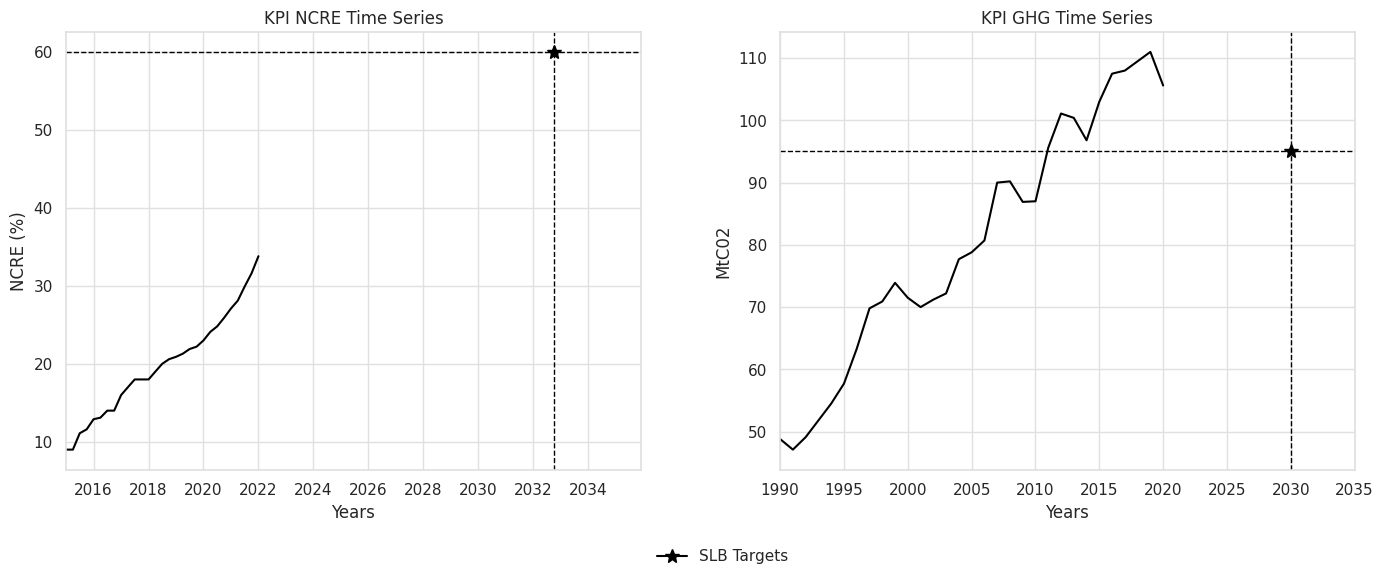

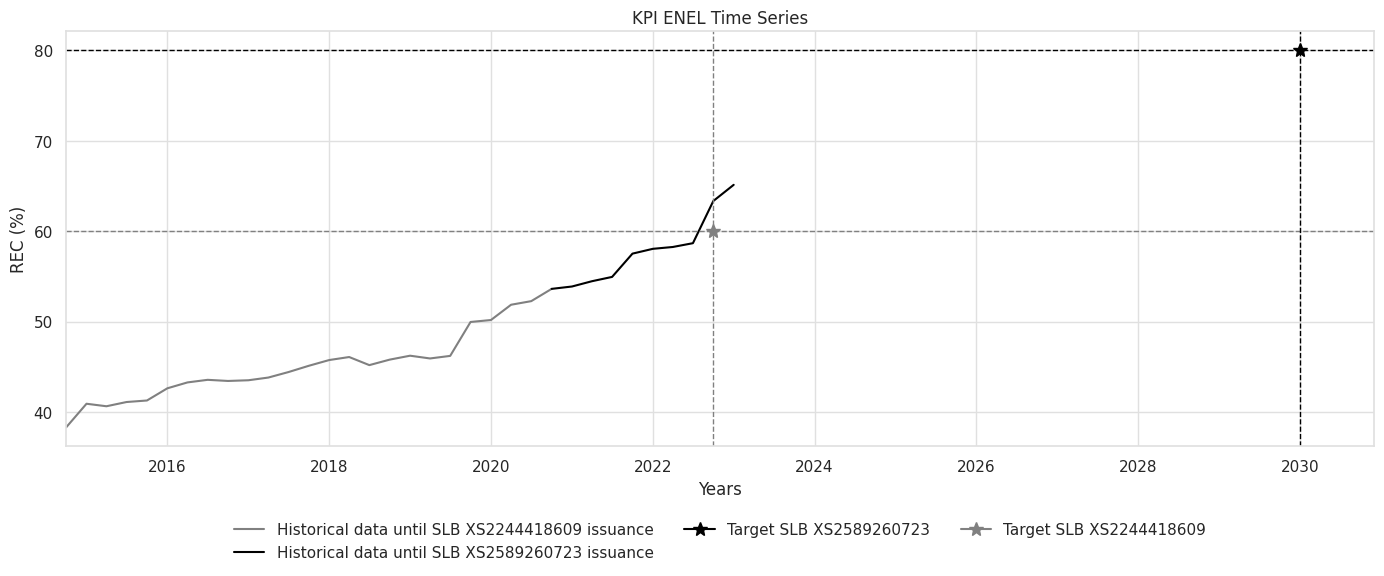

In [ ]:

kpi_ncre = np.array([9, 9, 11.1, 11.6, 12.9, 13.1, 14, 14, 16, 17, 18, 18, 18, 19, 20, 20.6, 20.9, 21.3, 21.9, 22.2, 23, 24.1,
       24.8, 25.9, 27.1, 28.1, 29.9, 31.6, 33.8])
kpi_ghg = np.array([
    48.8, 47.1, 49.1, 51.8, 54.5, 57.7, 63.3, 69.8, 70.9, 73.9, 71.5, 70.0, 71.2, 72.2, 77.7, 78.8,
    80.7, 90.0, 90.2, 86.9, 87.0, 95.6, 101.1, 100.4, 96.8, 103.0, 107.5, 108.0, 109.5, 111.0, 105.6
])
kpi_enel = np.array([0.38290744, 0.40907582,
    0.40630384, 0.41099488, 0.41267188, 0.4261573, 0.43267088,
    0.43553211, 0.43428198, 0.43505504, 0.4380508, 0.44413041,
    0.45108222, 0.4574235, 0.46074208, 0.45179673, 0.45787199,
    0.46221186, 0.45916642, 0.46199977, 0.49951985, 0.50166387,
    0.51857673, 0.52254823, 0.53611538, 0.53874128, 0.54457876,
    0.54934431, 0.57508787, 0.58040426, 0.5824372, 0.58664315,
    0.63328092, 0.6511867
]) * 100  # Multiply all data by 100

# Adjusting the date ranges
quarters_dates = np.arange(np.datetime64('2015-01'), np.datetime64('2036-01'), np.timedelta64(3, 'M'))
years_dates = np.arange(np.datetime64('1990'), np.datetime64('2036'), np.timedelta64(1, 'Y'))

# Data setup (Ensure kpi_ncre and kpi_ghg arrays are defined above this snippet)

# Setting up the plot with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Styling options
plt.rcParams['axes.edgecolor'] = '#e0e0e0'  # Very light grey edges
plt.rcParams['grid.color'] = '#e0e0e0'  # Very light grey grid lines

# Plotting kpi_ncre with the quarter timeline using the adjusted dates
ax[0].plot(quarters_dates[:len(kpi_ncre)], kpi_ncre, color='black')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('NCRE (%)')
ax[0].set_title('KPI NCRE Time Series')
ax[0].xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years for clarity
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[0].set_xlim([np.datetime64('2015-01'), np.datetime64('2035-12')])  # Extend x-axis to 2035
# Adding a horizontal line at value 60
ax[0].axhline(y=60, color='black', linestyle='--', linewidth=1)
# Adding a vertical line at 2032Q4
ax[0].axvline(x=np.datetime64('2032-10-01'), color='black', linestyle='--', linewidth=1)
# Adding a black star at the intersection
ax[0].plot(np.datetime64('2032-10-01'), 60, marker='*', color='black', markersize=10, label='SLB Targets')
ax[0].grid(True)  # Enable grid

# Plotting kpi_ghg with the year timeline using the adjusted dates
ax[1].plot(years_dates[:len(kpi_ghg)], kpi_ghg, color='black')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('MtC02')
ax[1].set_title('KPI GHG Time Series')
ax[1].xaxis.set_major_locator(mdates.YearLocator(5))  # Show every 5 years for clarity
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[1].set_xlim([np.datetime64('1990'), np.datetime64('2035')])  # Extend x-axis to 2035
# Adding a horizontal line at value 95
ax[1].axhline(y=95, color='black', linestyle='--', linewidth=1)
# Adding a vertical line at 2030
ax[1].axvline(x=np.datetime64('2030-01-01'), color='black', linestyle='--', linewidth=1)
# Adding a black star at the intersection
ax[1].plot(np.datetime64('2030-01-01'), 95, marker='*', color='black', markersize=10, label='SLB Targets')
ax[1].grid(True)  # Enable grid

# Improving layout and displaying the legend without an outline
plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15), fancybox=False, shadow=False, ncol=3, frameon=False)

# Display the plot
plt.tight_layout()
plt.show()



# Creating the date ranges
quarters_dates_enel = np.arange(np.datetime64('2014-10'), np.datetime64('2023-04'), np.timedelta64(3, 'M'))
extended_quarters = np.arange(np.datetime64('2014-10'), np.datetime64('2031-01'), np.timedelta64(3, 'M'))

# Setting up the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Styling options
plt.rcParams['axes.edgecolor'] = '#e0e0e0'  # Very light grey edges
plt.rcParams['grid.color'] = '#e0e0e0'  # Very light grey grid lines

# Plotting kpi_enel with different color segments
ax.plot(quarters_dates_enel[:25], kpi_enel[:25], color='grey', label='Historical data until SLB XS2244418609 issuance')  # Grey until the index of 0.53611538
ax.plot(quarters_dates_enel[24:], kpi_enel[24:], color='black', label='Historical data until SLB XS2589260723 issuance')  # Black after 0.53611538
ax.set_xlabel('Years')
ax.set_ylabel('REC (%)')
ax.set_title('KPI ENEL Time Series')
ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years for clarity
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlim([np.datetime64('2014-10'), np.datetime64('2030-12')])  # Extend x-axis to 2030Q4

# Adding vertical and horizontal lines with limits
intersection_2030 = (np.datetime64('2030-01-01'), 80)  # Adjusted for scale change
intersection_2022Q4 = (np.datetime64('2022-10-01'), 60)  # Adjusted for scale change
ax.plot(*intersection_2030, marker='*', color='black', markersize=10, label='Target SLB XS2589260723')  # Black star for Target B
ax.plot(*intersection_2022Q4, marker='*', color='grey', markersize=10, label='Target SLB XS2244418609')  # Grey star for Target A

# Drawing lines that stop at intersections
ax.axhline(y=80, color='black', linestyle='--', linewidth=1)
ax.axhline(y=60, color='grey', linestyle='--', linewidth=1)  # Grey horizontal line
ax.axvline(x=intersection_2030[0], color='black', linestyle='--', linewidth=1)
ax.axvline(x=intersection_2022Q4[0], color='grey', linestyle='--', linewidth=1)  # Grey vertical line

# Grid and enhanced legend
ax.grid(True)
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=False, ncol=3)
legend.get_frame().set_linewidth(0.0)

# Display the plot
plt.tight_layout()
plt.show()